In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
style='ticks',
context='talk',
font_scale=0.8,
rc={'figure.figsize': (8,6)}
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import warnings
from sklearn import preprocessing

warnings.filterwarnings("ignore", category=UserWarning)

In [682]:
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.inspection import PartialDependenceDisplay

In [443]:
#reading CSV file of AutoTrader(adverts) Dataset
cars = pd.read_csv('C:/Users/muham/OneDrive - MMU/Adv ML/adverts.csv')

In [444]:
cars.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [445]:
cars.shape

(402005, 12)

In [446]:
cars.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

In [447]:
cars.describe(include = 'all')

public_reference        mileage reg_code standard_colour  \
count       4.020050e+05  401878.000000   370148          396627   
unique               NaN            NaN       72              22   
top                  NaN            NaN       17           Black   
freq                 NaN            NaN    36738           86287   
mean        2.020071e+14   37743.595656      NaN             NaN   
std         1.691662e+10   34831.724018      NaN             NaN   
min         2.013072e+14       0.000000      NaN             NaN   
25%         2.020090e+14   10481.000000      NaN             NaN   
50%         2.020093e+14   28629.500000      NaN             NaN   
75%         2.020102e+14   56875.750000      NaN             NaN   
max         2.020110e+14  999999.000000      NaN             NaN   

       standard_make standard_model vehicle_condition  year_of_registration  \
count         402005         402005            402005         368694.000000   
unique           110           1168                 2                   NaN   
top              BMW           Golf              USED                   NaN   
freq           37376          11583            370756                   NaN   
mean             NaN            NaN               NaN           2015.006206   
std              NaN            NaN               NaN              7.962667   
min              NaN            NaN               NaN            999.000000   
25%              NaN            NaN               NaN           2013.000000   
50%              NaN            NaN               NaN           2016.000000   
75%              NaN            NaN               NaN           2018.000000   
max              NaN            NaN               NaN           2020.000000   

               price  body_type crossover_car_and_van fuel_type  
count   4.020050e+05     401168                402005    401404  
unique           NaN         16                     2         9  
top              NaN  Hatchback                 False    Petrol  
freq             NaN     167315                400210    216929  
mean    1.734197e+04        NaN                   NaN       NaN  
std     4.643746e+04        NaN                   NaN       NaN  
min     1.200000e+02        NaN                   NaN       NaN  
25%     7.495000e+03        NaN                   NaN       NaN  
50%     1.260000e+04        NaN                   NaN       NaN  
75%     2.000000e+04        NaN                   NaN       NaN  
max     9.999999e+06        NaN                   NaN       NaN

In [448]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [449]:
cars.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [450]:
# sns.heatmap(cars.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [451]:
cars.nunique()

public_reference         402005
mileage                   80634
reg_code                     72
standard_colour              22
standard_make               110
standard_model             1168
vehicle_condition             2
year_of_registration         84
price                     30578
body_type                    16
crossover_car_and_van         2
fuel_type                     9
dtype: int64

In [452]:
# attrib = 'standard_make'
# data = pd.concat([cars["price"], cars[attrib]], axis=1)
# f, ax = plt.subplots(figsize=(18, 12))
# fig = sns.boxplot(x=attrib, y="price", data=data);
# fig.axis(ymin=0, ymax=450000);

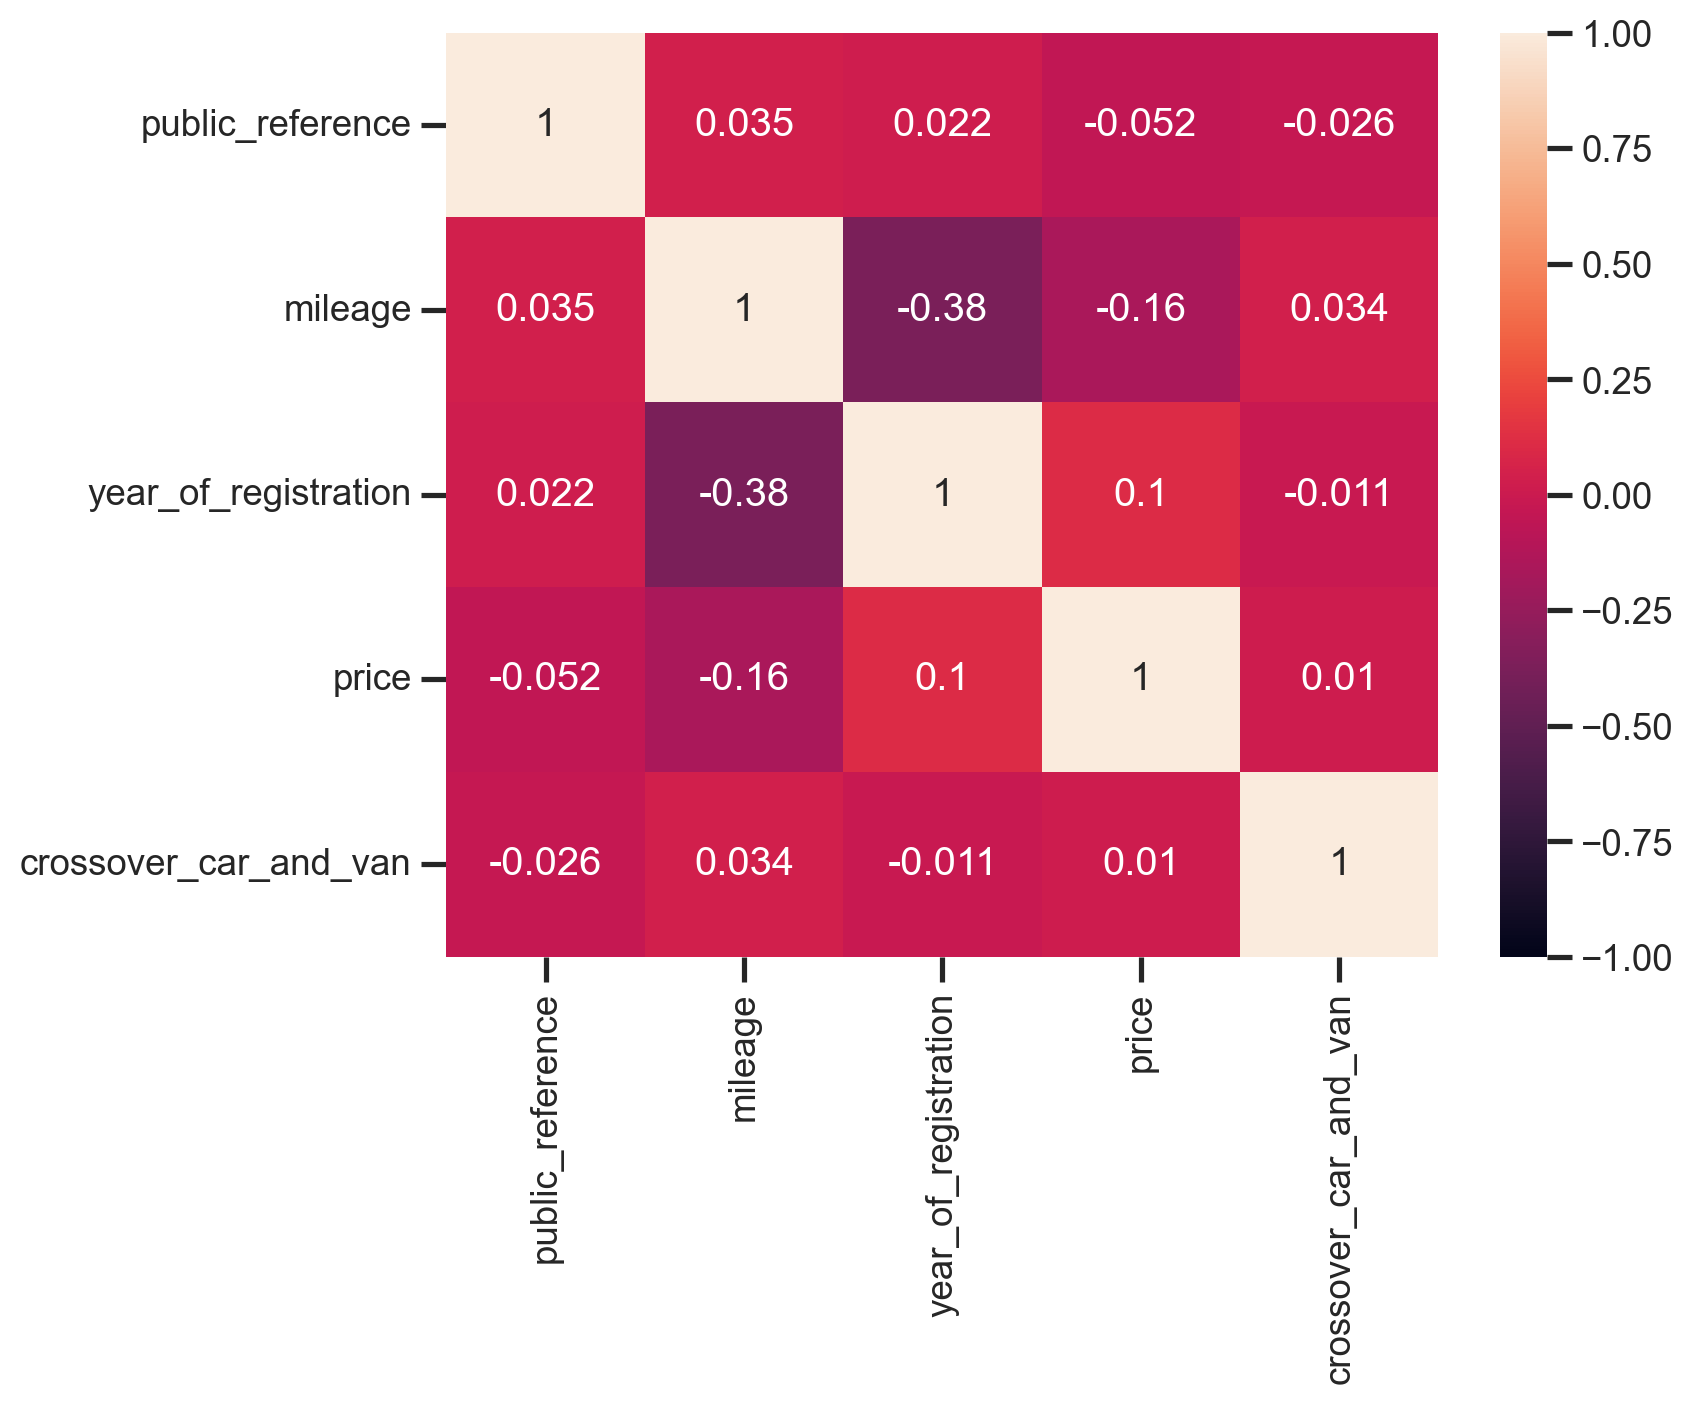

In [608]:
# For viewing the qualitative and qualitative relation between the numeric features 
# corelation matrix also includes boolean variable which is crossover_car_and_van in this dataset
sns.heatmap(cars.corr(),  vmin=-1, vmax=1, annot=True);

# Data Preprocessing

In [453]:
# Before data processing used .copy() method to copy whole dataframe one the origianl dataset won't be affected..
cars2 = cars.copy()

In [454]:
cars2.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [455]:
cars2.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [456]:
# For viewing the qualitative and qualitative relation between the numeric features 
# corelation matrix also includes boolean variable which is crossover_car_and_van in this dataset
# sns.heatmap(cars.corr(),  vmin=-1, vmax=1, annot=True);

In [457]:
print(cars['reg_code'].unique())

[nan '61' '17' '16' '64' '13' '08' '19' '60' '69' '66' '12' '18' '65' '09'
 'B' '10' '14' '03' '67' '63' '15' '68' '56' '20' '70' '62' '11' '05' '59'
 '58' 'W' '02' '57' '06' '52' '53' '04' 'J' '07' '55' '51' 'X' 'D' 'S' 'Y'
 '54' 'H' 'K' 'E' 'L' 'V' 'M' 'G' 'T' 'N' 'P' 'A' 'F' 'R' 'C' '94' '85'
 'CA' 'm' 'FW' '723xuu' '95' 's' '38' 'k' '37' 'p']


In [458]:
# # Create a function to map reg_code to year_of_registration
# def fill_year_of_registration(reg_code):
#     if 50 <= reg_code <= 70:
#         return 1950 + reg_code
#     elif 0 <= reg_code <= 20:
#         return 2000 + reg_code

# # Apply the function to fill the null values in year_of_registration column
# cars2['year_of_registration'] = cars2['year_of_registration'].fillna(cars2['reg_code'].apply(fill_year_of_registration))

# # Display the updated dataframe
# print(cars2)


In [459]:
cars2["year_of_registration"].fillna(value=cars2["year_of_registration"].mode()[0],inplace=True) 
cars2["year_of_registration"].isna().sum()

0

In [460]:
# cars2["mileage"].fillna(cars2["mileage"].median(), inplace=True)
# cars2.isna().sum()

In [461]:
# dropping these feature As we have seen in correlation 
cars2 = cars2.drop(['public_reference','reg_code','crossover_car_and_van'], axis=1)
cars2.isna().sum()

mileage                  127
standard_colour         5378
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                837
fuel_type                601
dtype: int64

In [462]:
cars2.isna().sum()

mileage                  127
standard_colour         5378
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                837
fuel_type                601
dtype: int64

In [463]:
cars2 = cars2.dropna(subset=['standard_colour', 'body_type', 'fuel_type'])

In [464]:
# For viewing the null values in the cars dataframe using heatmap. 

# sns.heatmap(cars2.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [465]:
# For viewing the duplicate rows in the datafrom 
# 8722 rows are duplicate
cars2.duplicated().value_counts()

False    386946
True       8434
dtype: int64

In [466]:
# REMOVING DUPLICATE ROWS
cars2.drop_duplicates(inplace=True)
cars2.duplicated().value_counts()

False    386946
dtype: int64

In [467]:
# REMOVING OUTLIERS
# Using Formula in outliers function to Calculate Q1, Q2, Interter Quartile range, Upperbound and lowerbound
# it will return the list of indexs where the data point are out of the upper and lower bound.
def outliers(car, column):
    Q1 = car[column].quantile(0.25)
    Q3 = car[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lowerlimit = Q1 - 1.5 * IQR
    upperlimit = Q3 + 1.5 * IQR
    print("Lower limit: " + column ,lowerlimit)
    print("Upper limit: " + column , upperlimit)
    list = car.index[(car[column] < lowerlimit) | (car[column] > upperlimit) ]
    return list

In [468]:
# it will pass the mileage and Year of registration column one by one to outliers function
# store the indexs of the outliers in the index_list
index_list = []
for features in ['mileage', 'year_of_registration']:
    index_list.extend(outliers(cars2, features))

Lower limit: mileage -57051.0
Upper limit: mileage 126317.0
Lower limit: year_of_registration 2008.0
Upper limit: year_of_registration 2024.0


In [469]:
index_list

[32,
 86,
 165,
 187,
 214,
 215,
 256,
 277,
 280,
 342,
 421,
 426,
 659,
 662,
 675,
 784,
 837,
 891,
 955,
 1178,
 1199,
 1258,
 1281,
 1290,
 1293,
 1316,
 1337,
 1360,
 1374,
 1438,
 1456,
 1520,
 1582,
 1647,
 1657,
 1658,
 1733,
 1801,
 1809,
 1815,
 1897,
 1968,
 2015,
 2031,
 2090,
 2096,
 2109,
 2166,
 2170,
 2171,
 2190,
 2194,
 2211,
 2222,
 2240,
 2249,
 2288,
 2296,
 2338,
 2342,
 2343,
 2390,
 2441,
 2506,
 2596,
 2604,
 2632,
 2650,
 2659,
 2671,
 2676,
 2693,
 2726,
 2770,
 2850,
 2998,
 3036,
 3127,
 3229,
 3230,
 3278,
 3283,
 3318,
 3335,
 3342,
 3357,
 3360,
 3393,
 3441,
 3474,
 3483,
 3554,
 3625,
 3644,
 3685,
 3692,
 3699,
 3734,
 3763,
 3791,
 3792,
 3882,
 3941,
 3943,
 3950,
 3959,
 3962,
 3994,
 4000,
 4007,
 4018,
 4057,
 4088,
 4203,
 4243,
 4249,
 4297,
 4318,
 4375,
 4585,
 4594,
 4796,
 4823,
 4852,
 4917,
 4931,
 4947,
 4980,
 5015,
 5050,
 5093,
 5100,
 5101,
 5200,
 5278,
 5328,
 5368,
 5473,
 5487,
 5506,
 5586,
 5597,
 5628,
 5639,
 5719,
 5796,

In [470]:
# Remove function will simply takes the dataframe and list of indexs of outliers.
# By using those indexs it will remove the outler from the dataset. 
def remove(car, list):
    list = sorted(set(list))
    car = car.drop(list)
    return car

In [471]:
# passing the cars2 dataframe and index_list(outliers index) to the remove function for removing outliers from data 
cars2= remove(cars2, index_list)

In [472]:
cars2.shape

(359884, 9)

In [473]:
cars2[cars2['price'] > 200000].value_counts().sum()

464

In [474]:
# calculate the 1st percentile of the 'price' column
lower_limit = cars2['price'].quantile(0.01)

# calculate the 99th percentile of the 'price' column
upper_limit = cars2['price'].quantile(0.99)

print(f'lower limit: {lower_limit}')
print(f'upper limit: {upper_limit}')


lower limit: 1990.0
upper limit: 87950.0


In [475]:
cars2 = cars2[(cars2['price'] > 1000) & (cars2['price'] < 200000)]

In [476]:
cars2.shape

(359081, 9)

In [477]:
cars2.head(5)

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

  vehicle_condition  year_of_registration  price  body_type  \
0               NEW                2017.0  73970        SUV   
1              USED                2011.0   7000     Saloon   
2              USED                2017.0  14000        SUV   
3              USED                2016.0   7995  Hatchback   
4              USED                2015.0  26995        SUV   

               fuel_type  
0  Petrol Plug-in Hybrid  
1                 Diesel  
2                 Petrol  
3                 Diesel  
4                 Diesel

In [478]:
cars2.isna().sum()

mileage                 102
standard_colour           0
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
fuel_type                 0
dtype: int64

In [613]:
cars_testing = cars2.copy()

In [615]:
import datetime

# Extracting the current year
current_year = datetime.datetime.now().year

# Calculate vehicle age for buyer help
cars_testing['vehicle_age'] = current_year - cars2['year_of_registration']

# Check the updated dataframe
cars_testing.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

  vehicle_condition  year_of_registration  price  body_type  \
0               NEW                2017.0  73970        SUV   
1              USED                2011.0   7000     Saloon   
2              USED                2017.0  14000        SUV   
3              USED                2016.0   7995  Hatchback   
4              USED                2015.0  26995        SUV   

               fuel_type  vehicle_age  
0  Petrol Plug-in Hybrid          6.0  
1                 Diesel         12.0  
2                 Petrol          6.0  
3                 Diesel          7.0  
4                 Diesel          8.0

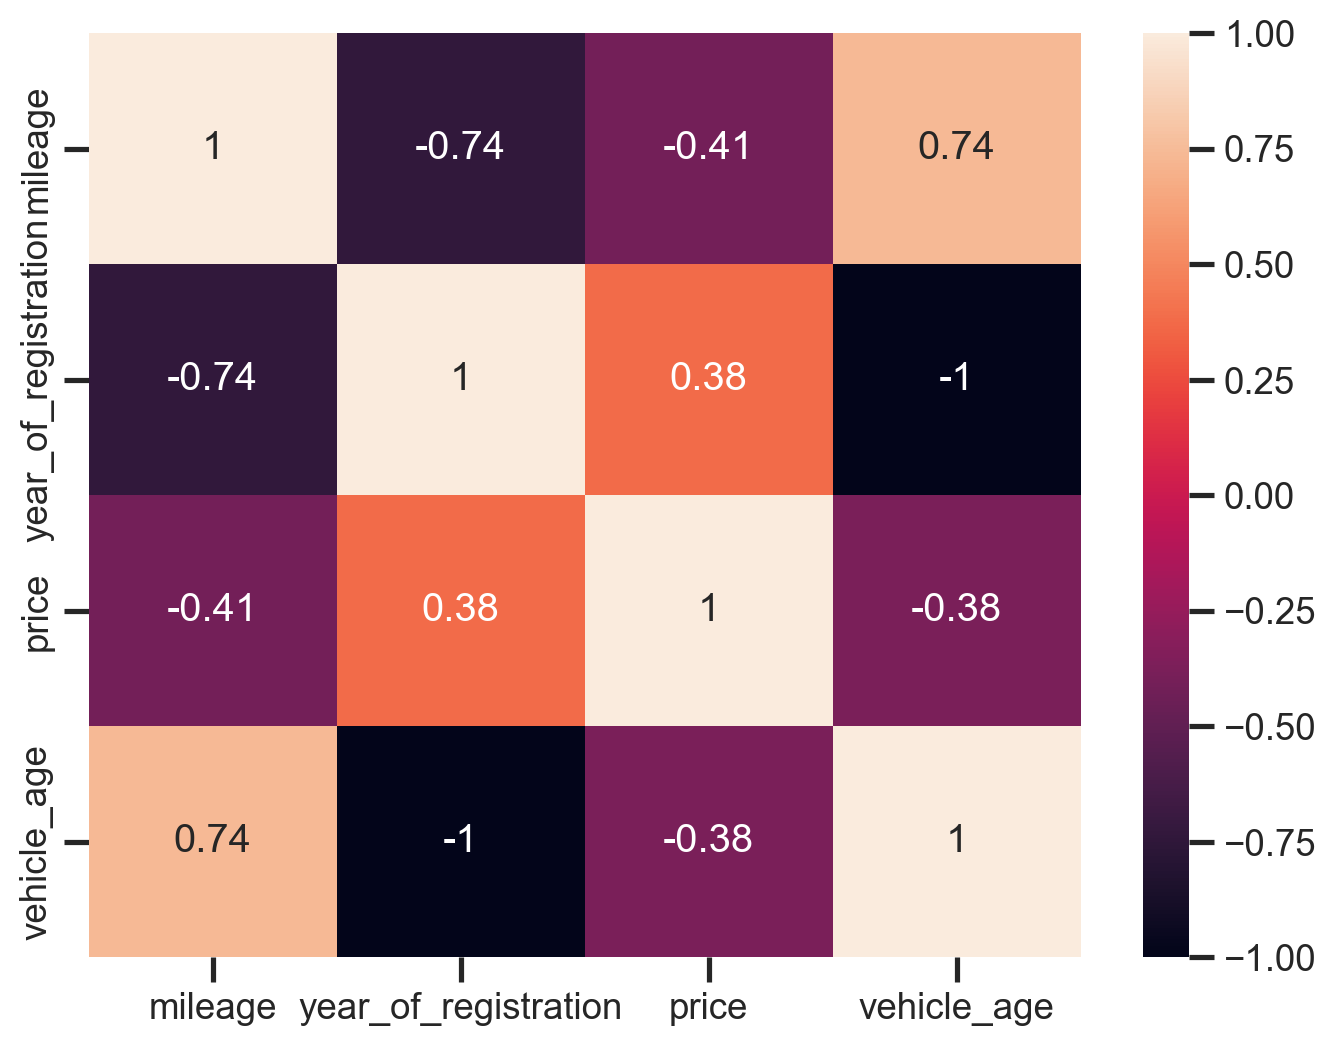

In [617]:
# For viewing the qualitative and qualitative relation between the numeric features 
# corelation matrix also includes boolean variable which is crossover_car_and_van in this dataset
sns.heatmap(cars_testing.corr(),  vmin=-1, vmax=1, annot=True);

In [479]:
cars3 = cars2.sample(100000).copy()

In [480]:
cars3.shape

(100000, 9)

In [481]:
# fig, ax = plt.subplots(figsize=(7,5))
# sns.regplot(
#     data=cars2, x='year_of_registration', y='price', 
#     scatter_kws=dict(alpha=0.3), ax=ax
# );

In [482]:
# fig, ax = plt.subplots(figsize=(7,5))
# sns.regplot(
#     data=cars2, x='mileage', y='price', 
#     scatter_kws=dict(alpha=0.3), ax=ax
# );

In [483]:
X, y = cars3.drop(columns='price'), cars3['price']

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [485]:
X.shape, y.shape

((100000, 8), (100000,))

# Feature Engineering

In [486]:
# def create_def_preprocessing_pipe(X):
#     """creates a default preprocessing pipeline for numeric and categorical data
#     using simple imputers, scalers, and encoders. It relies on latest versions
#     of sklearn so as to produce pandas outputs.
    
#     X: the dataset with the features (needed for feature names)

#     returns the Pipeline object
#     """

#     numeric_features = X.select_dtypes(exclude='object').columns.tolist()
#     numeric_transformer = Pipeline(
#         steps=[
#             ("imputer", SimpleImputer(strategy="median")), 
#             ("scaler", StandardScaler()),
#             ('poly', PolynomialFeatures(include_bias=False))
#         ]
#     ).set_output(transform='pandas')

#     categorical_features = X.select_dtypes(include='object').columns.tolist()
#     categorical_transformer = Pipeline(
#         steps=[
#             ("imputer", SimpleImputer(strategy="most_frequent")), 
#             ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')),
#         ]
#     ).set_output(transform='pandas')

#     preprocessor = ColumnTransformer(
#         transformers=[
#             ("num", numeric_transformer, numeric_features),
#             ("cat", categorical_transformer, categorical_features),
#         ],
#         remainder='passthrough',
#         verbose_feature_names_out=False
#     ).set_output(transform="pandas")

#     return preprocessor, numeric_transformer, numeric_features, categorical_features, categorical_transformer

In [609]:
numeric_features = X_train.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")), 
            ("scaler", StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]
    ).set_output(transform='pandas')

In [488]:
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")), 
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')),
        ]
    ).set_output(transform='pandas')

In [489]:
preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    ).set_output(transform="pandas")

In [610]:
# preprocessor, numeric_transformer, numeric_features, categorical_features, categorical_transformer= create_def_preprocessing_pipe(X_train)

# Print the transformed data using numeric_transformer
numeric_transformer.fit_transform(X_train[numeric_features]).head(2)

mileage  year_of_registration  mileage^2  \
387393 -1.166452               1.06164    1.36061   
254715  0.895896               0.36800    0.80263   

        mileage year_of_registration  year_of_registration^2  
387393                     -1.238352                1.127080  
254715                      0.329689                0.135424

In [491]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False))])

In [492]:
categorical_transformer.fit_transform(X_train[categorical_features]).head(2)

standard_colour_Beige  standard_colour_Black  standard_colour_Blue  \
387393                    0.0                    0.0                   1.0   
254715                    0.0                    1.0                   0.0   

        standard_colour_Bronze  standard_colour_Brown  \
387393                     0.0                    0.0   
254715                     0.0                    0.0   

        standard_colour_Burgundy  standard_colour_Gold  standard_colour_Green  \
387393                       0.0                   0.0                    0.0   
254715                       0.0                   0.0                    0.0   

        standard_colour_Grey  standard_colour_Magenta  ...  body_type_Saloon  \
387393                   0.0                      0.0  ...               0.0   
254715                   0.0                      0.0  ...               0.0   

        body_type_Window Van  fuel_type_Bi Fuel  fuel_type_Diesel  \
387393                   0.0                0.0               0.0   
254715                   0.0                0.0               1.0   

        fuel_type_Diesel Hybrid  fuel_type_Diesel Plug-in Hybrid  \
387393                      0.0                              0.0   
254715                      0.0                              0.0   

        fuel_type_Electric  fuel_type_Petrol  fuel_type_Petrol Hybrid  \
387393                 0.0               1.0                      0.0   
254715                 0.0               0.0                      0.0   

        fuel_type_Petrol Plug-in Hybrid  
387393                              0.0  
254715                              0.0  

[2 rows x 792 columns]

In [493]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [494]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['mileage', 'year_of_registration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['standard_colour', 'standard_make',
                                  'standard_model', 'vehicle_condition',
                                  'body_type', 'fuel_type'])],
                  verbose_feature_names_out=False)

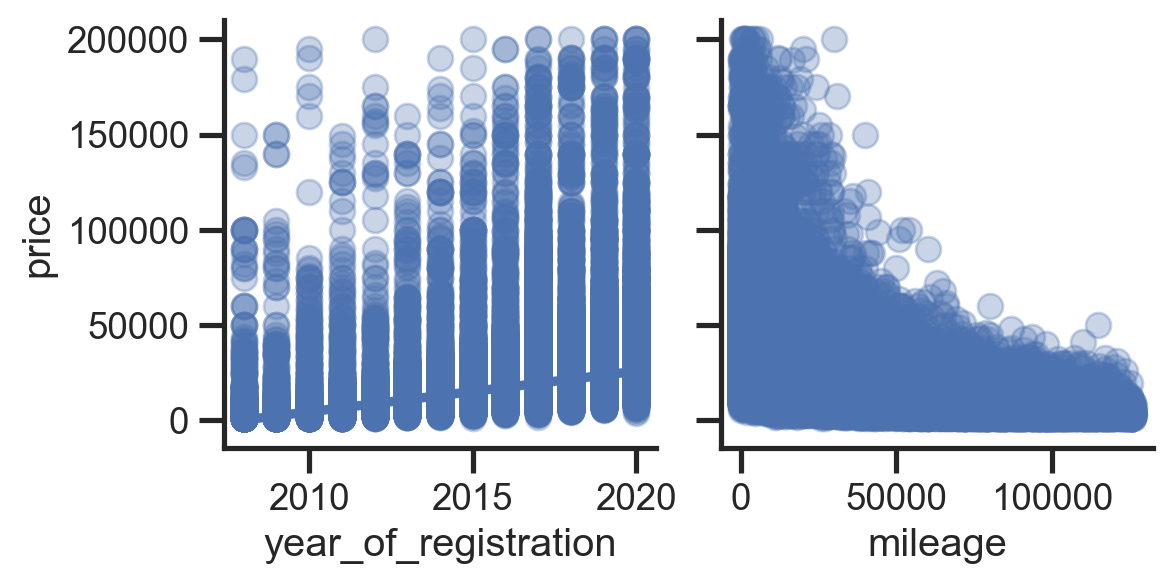

In [495]:
sns.pairplot(
    data=cars3, x_vars=['year_of_registration','mileage'], y_vars='price',
    height=3, kind='reg', plot_kws=dict(scatter_kws=(dict(alpha=0.3)))
);

# Automated Feature Selection

In [618]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("featsel", SelectKBest(f_regression, k=10)),
        ("regr", Ridge(alpha=100))
    ]
).set_output(transform="pandas")

In [619]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('featsel',
                 SelectKBest(score_func=<function f_regression at 0x0000022922995670>)),
                ('regr', Ridge(alpha=100))])

In [620]:
regr_pipe['featsel'].get_feature_names_out()

array(['mileage', 'year_of_registration', 'standard_make_Bentley',
       'standard_make_Ferrari', 'standard_make_Land Rover',
       'standard_make_Porsche', 'standard_model_911',
       'vehicle_condition_USED', 'body_type_Hatchback', 'body_type_SUV'],
      dtype=object)

In [621]:
regr_pipe['featsel'].transform(
    regr_pipe['preprocessor'].transform(X_train)
).head()

mileage  year_of_registration  standard_make_Bentley  \
387393 -1.166452              1.061640                    0.0   
254715  0.895896              0.368000                    0.0   
106644 -1.167658              0.368000                    0.0   
275299  1.071365             -1.019282                    0.0   
146475  2.243342             -1.712923                    0.0   

        standard_make_Ferrari  standard_make_Land Rover  \
387393                    0.0                       0.0   
254715                    0.0                       1.0   
106644                    0.0                       0.0   
275299                    0.0                       0.0   
146475                    0.0                       0.0   

        standard_make_Porsche  standard_model_911  vehicle_condition_USED  \
387393                    0.0                 0.0                     1.0   
254715                    0.0                 0.0                     1.0   
106644                    0.0                 0.0                     0.0   
275299                    0.0                 0.0                     1.0   
146475                    0.0                 0.0                     1.0   

        body_type_Hatchback  body_type_SUV  
387393                  0.0            0.0  
254715                  0.0            1.0  
106644                  0.0            1.0  
275299                  0.0            1.0  
146475                  0.0            0.0

In [622]:
regr_pipe.score(X_test, y_test)

0.4901439479784522

In [623]:
y_pred = regr_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11455.043703428619


In [625]:
scores = cross_val_score(
    regr_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'
)*-1
scores.mean(), scores.std()

(11574.172804539907, 234.7618258909764)

# Recursive Feature Elimination

In [503]:
model = Ridge(alpha=100)
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("featsel", RFECV(model, step=1, cv=5)),
    ]
).set_output(transform="pandas")

In [504]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('featsel', RFECV(cv=5, estimator=Ridge(alpha=100)))])

In [505]:
regr_pipe['featsel'].get_feature_names_out()

array(['mileage', 'year_of_registration', 'mileage^2',
       'mileage year_of_registration', 'year_of_registration^2',
       'standard_colour_Beige', 'standard_colour_Black',
       'standard_colour_Bronze', 'standard_colour_Brown',
       'standard_colour_Burgundy', 'standard_colour_Gold',
       'standard_colour_Green', 'standard_colour_Grey',
       'standard_colour_Maroon', 'standard_colour_Multicolour',
       'standard_colour_Orange', 'standard_colour_Pink',
       'standard_colour_Purple', 'standard_colour_Red',
       'standard_colour_Silver', 'standard_colour_Turquoise',
       'standard_colour_White', 'standard_colour_Yellow',
       'standard_make_AK', 'standard_make_Abarth',
       'standard_make_Alfa Romeo', 'standard_make_Alpine',
       'standard_make_Aston Martin', 'standard_make_Audi',
       'standard_make_BMW', 'standard_make_Bentley',
       'standard_make_Cadillac', 'standard_make_Caterham',
       'standard_make_Chevrolet', 'standard_make_Chrysler',
       'stan

In [506]:
regr_pipe['featsel'].transform(
    regr_pipe['preprocessor'].transform(X_train)
).head()

mileage  year_of_registration  mileage^2  \
387393 -1.166452              1.061640   1.360610   
254715  0.895896              0.368000   0.802630   
106644 -1.167658              0.368000   1.363425   
275299  1.071365             -1.019282   1.147824   
146475  2.243342             -1.712923   5.032584   

        mileage year_of_registration  year_of_registration^2  \
387393                     -1.238352                1.127080   
254715                      0.329689                0.135424   
106644                     -0.429698                0.135424   
275299                     -1.092024                1.038936   
146475                     -3.842672                2.934105   

        standard_colour_Beige  standard_colour_Black  standard_colour_Bronze  \
387393                    0.0                    0.0                     0.0   
254715                    0.0                    1.0                     0.0   
106644                    0.0                    0.0                     0.0   
275299                    0.0                    1.0                     0.0   
146475                    0.0                    0.0                     0.0   

        standard_colour_Brown  standard_colour_Burgundy  ...  \
387393                    0.0                       0.0  ...   
254715                    0.0                       0.0  ...   
106644                    0.0                       0.0  ...   
275299                    0.0                       0.0  ...   
146475                    0.0                       0.0  ...   

        body_type_Saloon  body_type_Window Van  fuel_type_Bi Fuel  \
387393               0.0                   0.0                0.0   
254715               0.0                   0.0                0.0   
106644               0.0                   0.0                0.0   
275299               0.0                   0.0                0.0   
146475               0.0                   0.0                0.0   

        fuel_type_Diesel  fuel_type_Diesel Hybrid  \
387393               0.0                      0.0   
254715               1.0                      0.0   
106644               0.0                      0.0   
275299               1.0                      0.0   
146475               1.0                      0.0   

        fuel_type_Diesel Plug-in Hybrid  fuel_type_Electric  fuel_type_Petrol  \
387393                              0.0                 0.0               1.0   
254715                              0.0                 0.0               0.0   
106644                              0.0                 0.0               1.0   
275299                              0.0                 0.0               0.0   
146475                              0.0                 0.0               0.0   

        fuel_type_Petrol Hybrid  fuel_type_Petrol Plug-in Hybrid  
387393                      0.0                              0.0  
254715                      0.0                              0.0  
106644                      0.0                              0.0  
275299                      0.0                              0.0  
146475                      0.0                              0.0  

[5 rows x 675 columns]

In [507]:
regr_pipe.score(X_test, y_test)

0.7664645717249685

In [508]:
y_pred = regr_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 7752.63518932629


In [509]:
scores = cross_val_score(
    regr_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'
)*-1
scores.mean(), scores.std()

(8242.858588583693, 233.9229131006153)

In [510]:
scores.mean(), scores.std()

(8242.858588583693, 233.9229131006153)

# Dimensionality Reduction With PCA

In [511]:
n_components = 2  # Specify the desired number of components
pca = PCA(n_components=n_components)


In [512]:
# Preprocess the training data using the preprocessor
X_preprocessed = preprocessor.transform(X_train)

In [513]:
X_preprocessed

mileage  year_of_registration  mileage^2  \
387393 -1.166452              1.061640   1.360610   
254715  0.895896              0.368000   0.802630   
106644 -1.167658              0.368000   1.363425   
275299  1.071365             -1.019282   1.147824   
146475  2.243342             -1.712923   5.032584   
...          ...                   ...        ...   
229601 -0.361161              0.368000   0.130438   
215608  0.048669              0.368000   0.002369   
340226  0.492579             -2.059743   0.242634   
349018 -0.800144              1.061640   0.640231   
45159  -0.869167              1.061640   0.755452   

        mileage year_of_registration  year_of_registration^2  \
387393                     -1.238352                1.127080   
254715                      0.329689                0.135424   
106644                     -0.429698                0.135424   
275299                     -1.092024                1.038936   
146475                     -3.842672                2.934105   
...                              ...                     ...   
229601                     -0.132907                0.135424   
215608                      0.017910                0.135424   
340226                     -1.014587                4.242542   
349018                     -0.849466                1.127080   
45159                      -0.922743                1.127080   

        standard_colour_Beige  standard_colour_Black  standard_colour_Blue  \
387393                    0.0                    0.0                   1.0   
254715                    0.0                    1.0                   0.0   
106644                    0.0                    0.0                   0.0   
275299                    0.0                    1.0                   0.0   
146475                    0.0                    0.0                   0.0   
...                       ...                    ...                   ...   
229601                    0.0                    0.0                   0.0   
215608                    0.0                    0.0                   0.0   
340226                    0.0                    0.0                   0.0   
349018                    0.0                    0.0                   0.0   
45159                     0.0                    0.0                   0.0   

        standard_colour_Bronze  standard_colour_Brown  ...  body_type_Saloon  \
387393                     0.0                    0.0  ...               0.0   
254715                     0.0                    0.0  ...               0.0   
106644                     0.0                    0.0  ...               0.0   
275299                     0.0                    0.0  ...               0.0   
146475                     0.0                    0.0  ...               0.0   
...                        ...                    ...  ...               ...   
229601                     0.0                    0.0  ...               0.0   
215608                     0.0                    0.0  ...               0.0   
340226                     0.0                    0.0  ...               0.0   
349018                     0.0                    0.0  ...               0.0   
45159                      0.0                    0.0  ...               0.0   

        body_type_Window Van  fuel_type_Bi Fuel  fuel_type_Diesel  \
387393                   0.0                0.0               0.0   
254715                   0.0                0.0               1.0   
106644                   0.0                0.0               0.0   
275299                   0.0                0.0               1.0   
146475                   0.0                0.0               1.0   
...                      ...                ...               ...   
229601                   0.0                0.0               0.0   
215608                   0.0                0.0               0.0   
340226                   0.0                0.0               0.0   
349018         

In [514]:
#X_pca = pca.fit_transform(X)
X_pca = pca.fit_transform(X_preprocessed)
X_pca

array([[-0.20389842, -0.28650593],
       [-0.89993732,  1.07921487],
       [-0.95056594,  0.44254123],
       ...,
       [ 2.26702351, -2.9203327 ],
       [-0.62138695, -0.23963725],
       [-0.58639113, -0.60630991]])

In [515]:
# Converting the transformed data into a DataFrame
X_reduced = pd.DataFrame(X_pca, columns=["PC{}".format(i + 1) for i in range(n_components)])
X_reduced

PC1       PC2
0     -0.203898 -0.286506
1     -0.899937  1.079215
2     -0.950566  0.442541
3      0.930797  0.475944
4      5.952345  1.662675
...         ...       ...
74995 -1.481774 -0.084847
74996 -1.481752 -0.122938
74997  2.267024 -2.920333
74998 -0.621387 -0.239637
74999 -0.586391 -0.606310

[75000 rows x 2 columns]

In [516]:
# Analyze the explained variance ratio
pca.explained_variance_ratio_

array([0.43081449, 0.11949824])

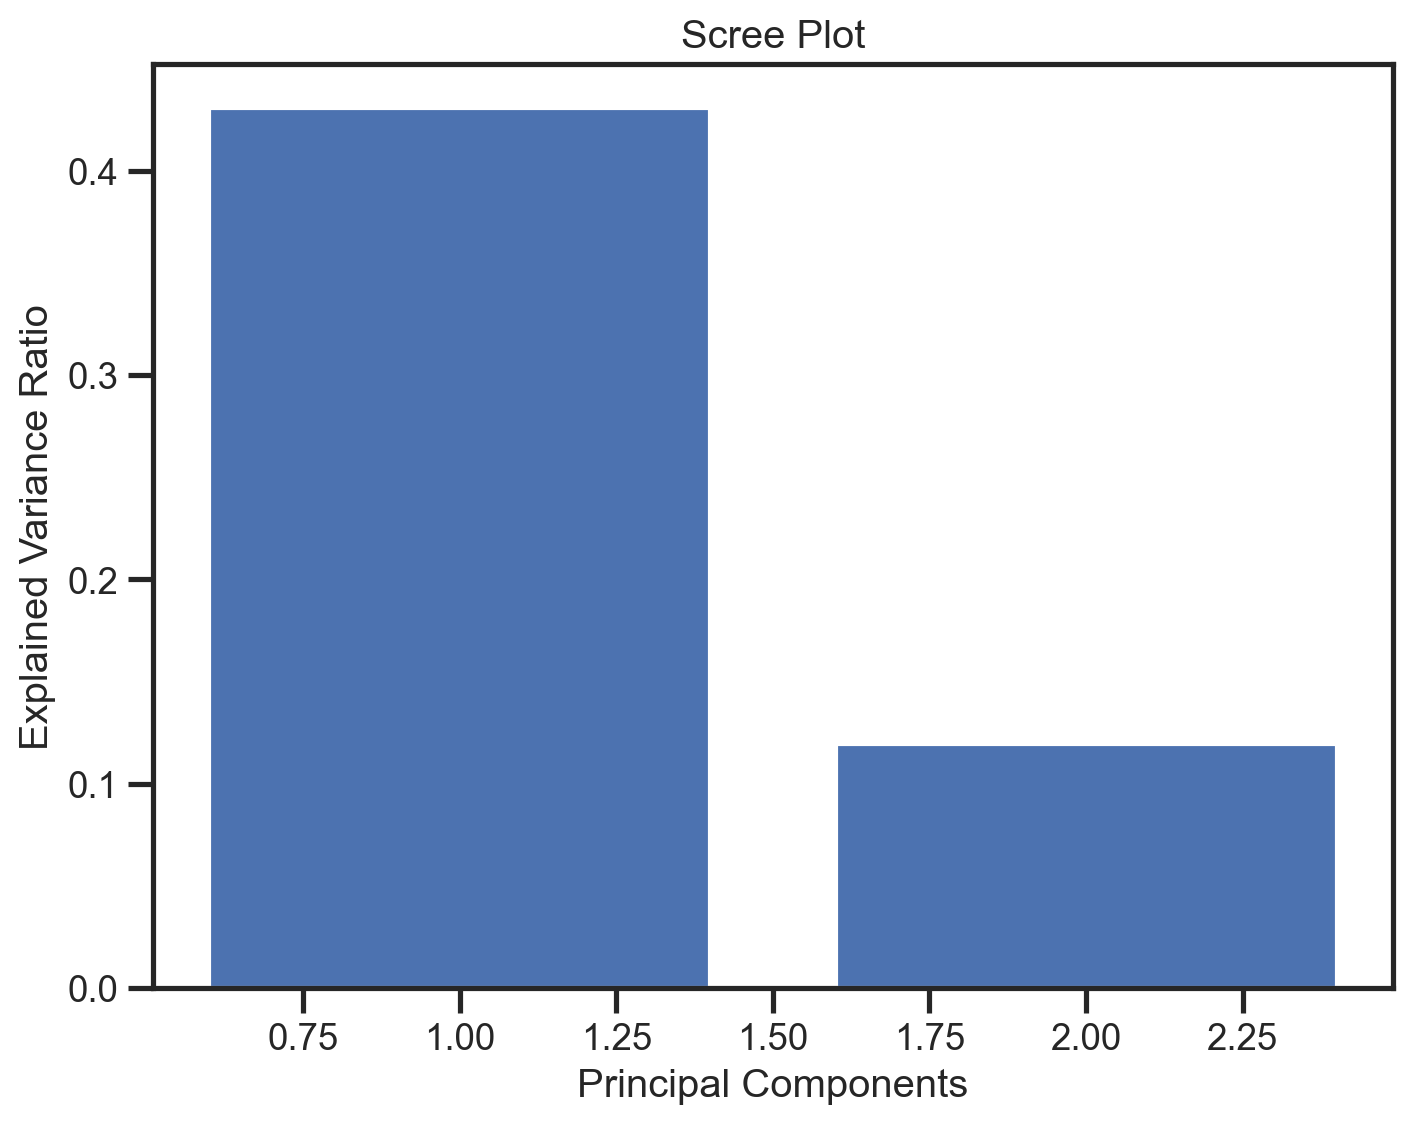

In [517]:
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

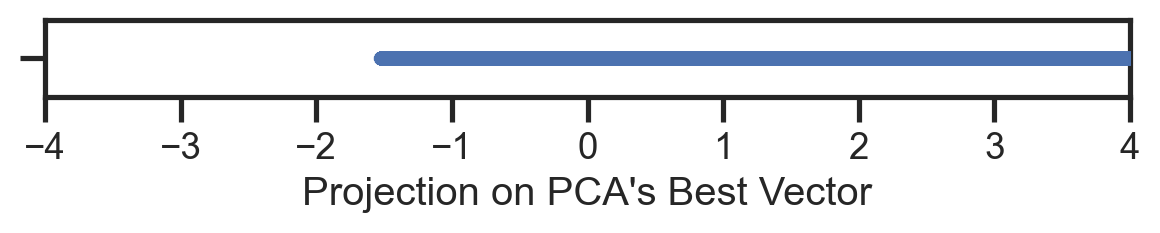

In [518]:
xlim = (-4, +4)
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=X_pca[:,0], jitter=False, alpha=0.5, ax=ax)
ax.set_xlim(xlim)
ax.set_xlabel("Projection on PCA's Best Vector");

In [627]:


# transform data onto the first two principal components
print("Original shape: {}".format(str(X_preprocessed.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

#malignant_pca = pca.transform(malignant)

Original shape: (75000, 797)
Reduced shape: (75000, 2)


# LASSO Regression

In [520]:
lasso_pipe = Pipeline(
        steps=[
            ("pp", preprocessor),
            ("regr", Lasso())
        ]
    ).set_output(transform="pandas")

In [521]:
lasso_pipe

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr', Lasso())])

In [522]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr', Lasso())])

In [523]:
lasso_pipe.score(X_test, y_test)

0.8697530302822067

In [633]:
lasso_pipe.score(X_train, y_train)

0.8655215274751387

In [524]:
#rmse(y_test, regr_pipe.predict(X_test))
y_pred = lasso_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5789.709521196294


In [525]:
# cores = cross_val_score(
#     lasso_pipe, X_train, y_train, cv=10, scoring='balanced_accuracy'
# )
# cores.mean(), cores.std()

In [526]:
scores = cross_val_score(
    lasso_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'
)*-1
scores.mean(), scores.std()

(6109.28898030528, 176.06096176817493)

# Random Forest Tree

In [527]:
clf_model = RandomForestRegressor(
    max_depth=20, min_samples_split=15, min_samples_leaf=8, n_estimators=200
)

In [528]:
clf_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("clf", clf_model)
    ]
).set_output(transform="pandas")

In [529]:
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('clf',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=8,
                                       min_samples_split=15,
                                       n_estimators=200))])

In [530]:
clf_pipe.score(X_test, y_test)

0.8709039220471331

In [635]:
clf_pipe.score(X_train, y_train)

0.8991514875091312

In [531]:
#rmse(y_test, clf_pipe.predict(X_test))
y_pred = clf_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5764.073170155276


In [532]:
scores = cross_val_score(
    clf_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'
)
scores.mean(), scores.std()

(-5852.6496495704605, 233.97207272972918)

# Boosting Regressor

In [533]:
Boosting_model = HistGradientBoostingRegressor(
    max_depth=20, max_iter=400
)

In [534]:
Boosting_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("clf", Boosting_model)
    ]
).set_output(transform="pandas")

In [535]:
Boosting_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('clf',
                 HistGradientBoostingRegressor(max_depth=20, max_iter=400))])

In [536]:
Boosting_pipe.score(X_test, y_test)

0.920484971426845

In [636]:
Boosting_pipe.score(X_train, y_train)

0.9399687332995121

In [537]:
#rmse(y_test, Boosting_pipe.predict(X_test))
y_pred = Boosting_pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4523.739319371329


In [538]:
scores = cross_val_score(
    Boosting_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'
)
scores.mean(), scores.std()

(-4623.169820938802, 212.68547948646432)

# Ensemble Regression

In [539]:
gbr = GradientBoostingRegressor(max_depth=8, random_state=0)

In [540]:
GradBoosting_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("clf", Boosting_model)
    ]
).set_output(transform="pandas")

In [629]:
ensembled = [ clf_pipe, Boosting_pipe, GradBoosting_pipe, lasso_pipe ]

In [631]:
for est in ensembled:
    est.fit(X_train, y_train)

In [637]:
ensemble = VotingRegressor(
    [
        ("rfr", clf_pipe),
        ("gb", GradBoosting_pipe),  
        ("hbg", Boosting_pipe),
        ("lasso", lasso_pipe)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(include_bias=False))]),
                                                                               ['mileage',
                                                                                'year_of_registration']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImput...
                                                                               ['mileage',
                                                                                'year_of_registration']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])],
                                                                verbose_feature_names_out=False)),
                                             ('regr', Lasso())]))])

In [638]:
ensemble.score(X_test, y_test)

0.921876661839004

In [639]:
ensemble.score(X_train, y_train)

0.9354020915798923

In [670]:
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4483.976802494615


In [544]:
all_regr = ensembled + [ ensemble ]

In [545]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(scores.mean()*-1, scores.std())

5954.265149205728 171.13896433922287
5028.430929813046 336.5440356348849
4838.023086676243 382.17250254881793
6109.28898030528 176.06096176817493
4705.350482430347 194.86782472248467


In [546]:
X_preprocessor = preprocessor.transform(X)

In [547]:
X_processed = pd.DataFrame(X_preprocessor, columns=X.columns)

In [646]:
xt = X.head(20)
pred1 = GradBoosting_pipe.predict(xt)
pred2 = clf_pipe.predict(xt)
pred3 = Boosting_pipe.predict(xt)
pred4 = lasso_pipe.predict(xt)
pred5 = ensemble.predict(xt)

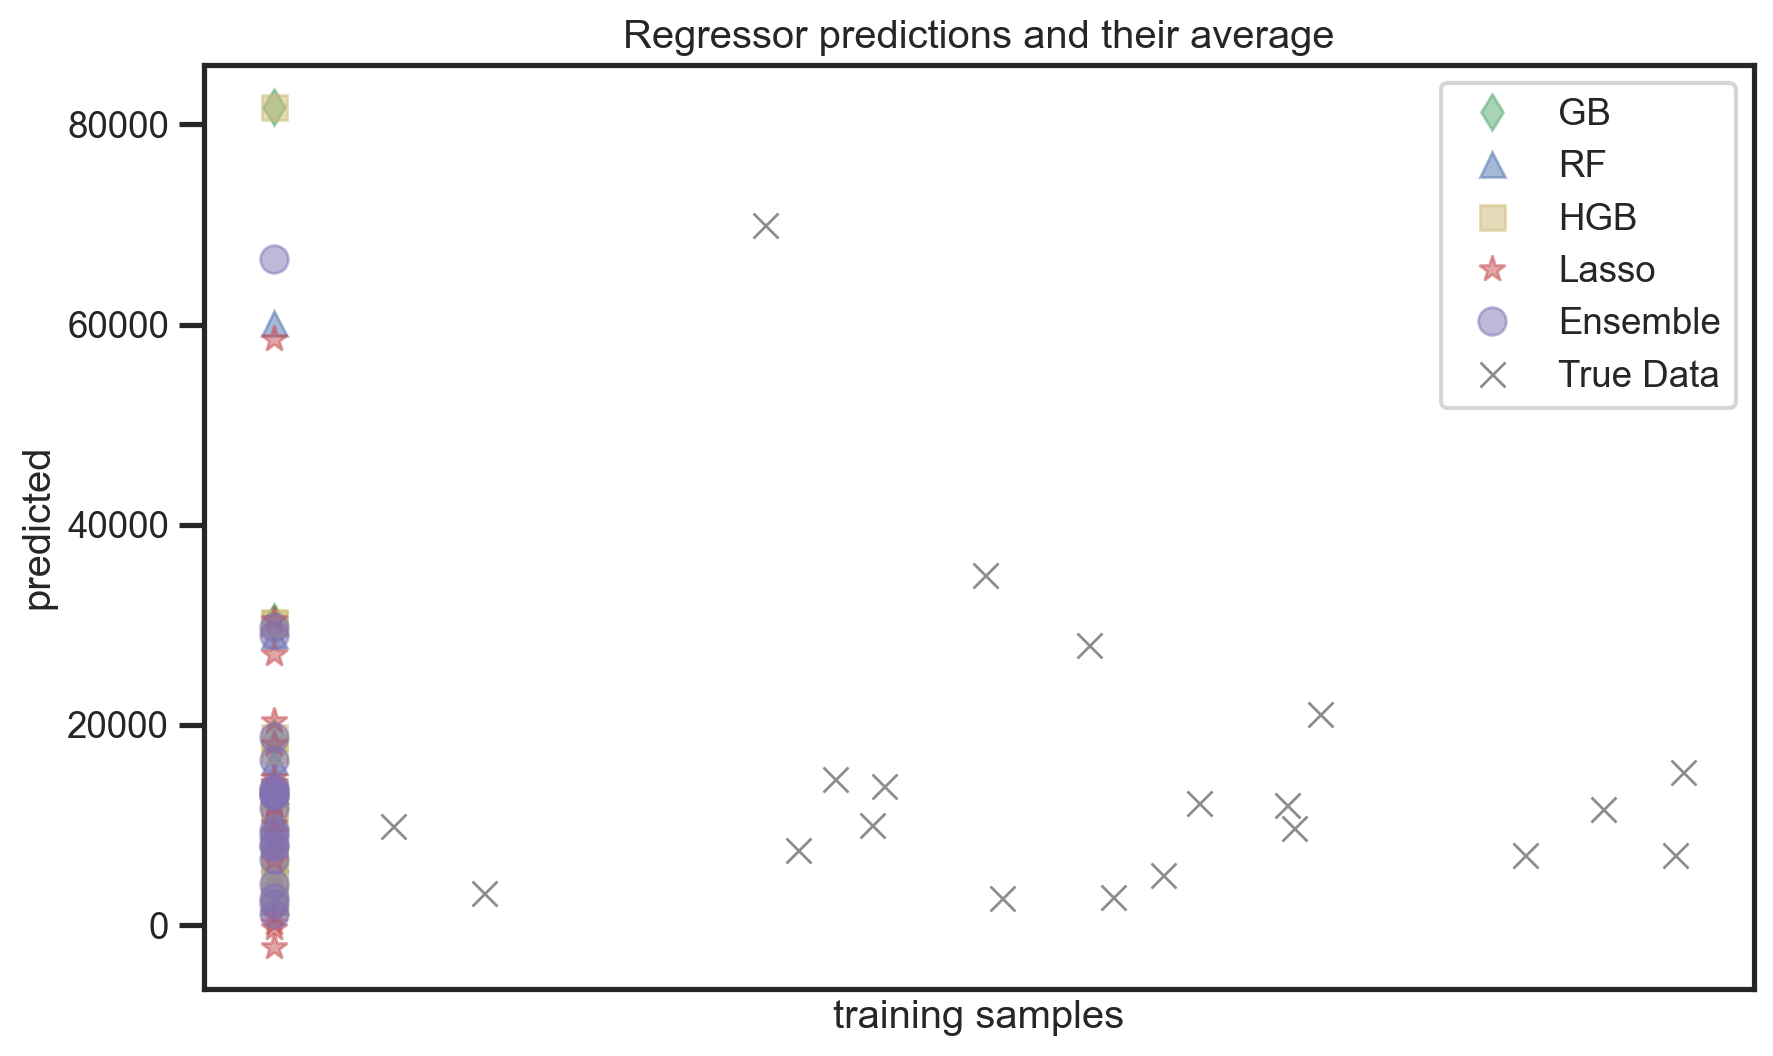

In [647]:

plt.figure(figsize=(10, 6))
plt.plot(pred1, "gd", alpha=0.5, label="GB")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred3, "ys", alpha=0.5, label="HGB")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Lasso")
plt.plot(pred5, "mo", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [640]:
instance = X.head(5)
instance

mileage standard_colour standard_make standard_model  \
287789  43105.0            Blue      Vauxhall        Mokka X   
33439   12954.0           Black       Peugeot            208   
397865  24354.0            Grey    Volkswagen         Tiguan   
59109   67000.0             Red           Kia           Ceed   
200564  21496.0           Black        Jaguar         F-PACE   

       vehicle_condition  year_of_registration  body_type fuel_type  
287789              USED                2017.0        SUV    Diesel  
33439               USED                2018.0  Hatchback    Diesel  
397865              USED                2016.0        SUV    Petrol  
59109               USED                2010.0  Hatchback    Diesel  
200564              USED                2017.0        SUV    Diesel

In [645]:
(GradBoosting_pipe.predict(instance), clf_pipe.predict(instance), Boosting_pipe.predict(instance), lasso_pipe.predict(instance), ensemble.predict(instance))

(array([10441.20768429, 11917.67562105, 17447.46717195,  3751.72117314,
        30317.56848494]),
 array([10386.05154519, 10973.36131783, 12955.29262061,  3972.26817595,
        29000.27349461]),
 array([10441.20768429, 11917.67562105, 17447.46717195,  3751.72117314,
        30317.56848494]),
 array([ 7390.19897123, 12095.67948054, 18062.14956138,  -331.89095974,
        30496.6795804 ]),
 array([ 9537.81008443, 11667.2857004 , 16486.5819842 ,  2681.92532015,
        29734.7608761 ]))

In [642]:
y.head(5)

287789     9690
33439      9850
397865    15295
59109      3200
200564    34991
Name: price, dtype: int64

# Grid Search On Lasso

In [553]:
param_grid = {
    'regr__alpha': np.logspace(-3, 3, 7),
    'polynomial__degree': np.linspace(1, 5, 5, dtype='int')
}

In [554]:
lasso = Lasso()
Grid_regr = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures()),
    ('regr', lasso)
])

In [555]:
list(ParameterGrid(param_grid))

[{'polynomial__degree': 1, 'regr__alpha': 0.001},
 {'polynomial__degree': 1, 'regr__alpha': 0.01},
 {'polynomial__degree': 1, 'regr__alpha': 0.1},
 {'polynomial__degree': 1, 'regr__alpha': 1.0},
 {'polynomial__degree': 1, 'regr__alpha': 10.0},
 {'polynomial__degree': 1, 'regr__alpha': 100.0},
 {'polynomial__degree': 1, 'regr__alpha': 1000.0},
 {'polynomial__degree': 2, 'regr__alpha': 0.001},
 {'polynomial__degree': 2, 'regr__alpha': 0.01},
 {'polynomial__degree': 2, 'regr__alpha': 0.1},
 {'polynomial__degree': 2, 'regr__alpha': 1.0},
 {'polynomial__degree': 2, 'regr__alpha': 10.0},
 {'polynomial__degree': 2, 'regr__alpha': 100.0},
 {'polynomial__degree': 2, 'regr__alpha': 1000.0},
 {'polynomial__degree': 3, 'regr__alpha': 0.001},
 {'polynomial__degree': 3, 'regr__alpha': 0.01},
 {'polynomial__degree': 3, 'regr__alpha': 0.1},
 {'polynomial__degree': 3, 'regr__alpha': 1.0},
 {'polynomial__degree': 3, 'regr__alpha': 10.0},
 {'polynomial__degree': 3, 'regr__alpha': 100.0},
 {'polynomial__d

In [556]:
# Create GridSearchCV object
grid_search = GridSearchCV(Grid_regr, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)

In [557]:
grid_search.fit(X_train, y_train)


140 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\muham\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\muham\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\muham\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\muham\AppData\Roaming\Python\Python39\site-packages\joblib\memo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['mileage',
                                                                          'year_of_registration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(stra...
                                                                          'standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('polynomial', PolynomialFeatures()),
                                       ('regr', Lasso())]),
             param_grid={'polynomial__degree': array([1, 2, 3, 4, 5]),
                         'regr__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [558]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [559]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('polynomial', PolynomialFeatures(degree=1)),
                ('regr', Lasso(alpha=0.1))])

In [560]:
best_params

{'polynomial__degree': 1, 'regr__alpha': 0.1}

In [561]:
grid_search.cv_results_

{'mean_fit_time': array([18.70473413, 22.57081394, 24.19251785, 21.37975955,  6.00399241,
         1.99628429,  1.57925887,  0.69319496,  0.69383812,  0.6979691 ,
         0.68979135,  0.69166713,  0.68907423,  0.690344  ,  0.72980962,
         0.72794142,  0.72623415,  0.73283162,  0.72537475,  0.72893167,
         0.72944736,  0.68767443,  0.68712034,  0.68510537,  0.68000331,
         0.68121867,  0.68381486,  0.68508058,  0.68912163,  0.68944812,
         0.68967485,  0.69042344,  0.6894722 ,  0.69037189,  0.69074392]),
 'std_fit_time': array([3.83498103e+00, 1.27256266e+00, 2.82278121e-01, 3.35409173e+00,
        4.04299310e+00, 2.50819616e-02, 1.70324874e-02, 5.95397411e-03,
        4.48358446e-03, 1.19832370e-02, 8.08658862e-03, 4.85030308e-03,
        7.45269254e-03, 9.41556975e-03, 3.28253203e-03, 2.87500882e-03,
        6.46466226e-03, 1.05615728e-02, 7.86282295e-03, 6.73286193e-03,
        7.06727315e-03, 1.32692104e-02, 2.37240426e-03, 8.67347796e-03,
        4.58146532e-03

In [562]:
gs_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [563]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_polynomial__degree', 'param_regr__alpha', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [564]:
gs_results[[
    'param_polynomial__degree', 'param_regr__alpha', 
    'mean_test_score', 'std_test_score',
    'rank_test_score'
]]

param_polynomial__degree param_regr__alpha  mean_test_score  \
2                         1               0.1     -5998.350186   
1                         1              0.01     -5999.433332   
0                         1             0.001     -6001.358988   
3                         1               1.0     -6109.288980   
4                         1              10.0     -7263.058615   
5                         1             100.0    -11108.287932   
6                         1            1000.0    -13812.034059   
22                        4              0.01              NaN   
23                        4               0.1              NaN   
24                        4               1.0              NaN   
25                        4              10.0              NaN   
26                        4             100.0              NaN   
30                        5               0.1              NaN   
28                        5             0.001              NaN   
29                        5              0.01              NaN   
21                        4             0.001              NaN   
31                        5               1.0              NaN   
32                        5              10.0              NaN   
27                        4            1000.0              NaN   
20                        3            1000.0              NaN   
17                        3               1.0              NaN   
18                        3              10.0              NaN   
33                        5             100.0              NaN   
16                        3               0.1              NaN   
15                        3              0.01              NaN   
14                        3             0.001              NaN   
13                        2            1000.0              NaN   
12                        2             100.0              NaN   
11                        2              10.0              NaN   
10                        2               1.0              NaN   
9                         2               0.1              NaN   
8                         2              0.01              NaN   
7                         2             0.001              NaN   
19                        3             100.0              NaN   
34                        5            1000.0              NaN   

    std_test_score  rank_test_score  
2       182.867304                1  
1       168.267005                2  
0       166.285715                3  
3       176.060962                4  
4       182.777654                5  
5       247.484878                6  
6       223.916355                7  
22             NaN                8  
23             NaN                8  
24             NaN                8  
25             NaN                8  
26             NaN                8  
30             NaN                8  
28             NaN                8  
29             NaN                8  
21             NaN                8  
31             NaN                8  
32             NaN                8  
27             NaN                8  
20             NaN                8  
17             NaN                8  
18             NaN                8  
33             NaN                8  
16             NaN                8  
15             NaN                8  
14             NaN                8  
13             NaN                8  
12             NaN                8  
11             NaN                8  
10             NaN                8  
9              NaN                8  
8              NaN                8  
7              NaN                8  
19             NaN                8  
34             NaN                8

In [565]:
y_pred = best_model.predict(X_test)
print("Predicted values (y_pred):", y_pred)

Predicted values (y_pred): [ 8136.11576811 11192.48815494 19124.2421982  ... 10662.3971002
  3044.37283051  4909.04944775]


In [566]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 5677.8688305541045


In [567]:
print("Best score: {:.2f}".format(grid_search.best_score_))

Best score: -5998.35


# Grid Search HDB

In [649]:
# Define the parameter grid for Grid Search
param_grid = {
    "regressor__max_depth": [8, 10, 12, 20],
    "regressor__max_iter": [100, 200, 300, 400]
}

In [650]:
pipeline_hgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", HistGradientBoostingRegressor())
    ]
)


In [651]:
# Perform Grid Search
grid_search = GridSearchCV(pipeline_hgb, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['mileage',
                                                                          'year_of_registration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(stra...
                                                                                                        sparse_output=False))]),
                                                                         ['standard_colour',
                                                                          'standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('regressor',
                                        HistGradientBoostingRegressor())]),
             param_grid={'regressor__max_depth': [8, 10, 12, 20],
                         'regressor__max_iter': [100, 200, 300, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [652]:
gs_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [653]:
best_params

{'regressor__max_depth': 12, 'regressor__max_iter': 400}

In [654]:
grid_search.cv_results_

{'mean_fit_time': array([10.99129343, 19.47855144, 28.30863514, 36.02261329, 12.39049897,
        22.72231131, 33.30260201, 39.16248889, 13.50735273, 24.27168832,
        35.04548988, 43.62896795, 15.05142527, 26.74598918, 35.28319964,
        44.47586923]),
 'std_fit_time': array([0.16249265, 0.42939653, 0.2892547 , 2.95972686, 0.56671015,
        0.65235386, 0.13494856, 7.03968985, 0.23811982, 0.28598217,
        0.78916493, 4.4288641 , 0.40795785, 0.35578537, 3.55104471,
        6.47393306]),
 'mean_score_time': array([0.20332994, 0.22934871, 0.24071569, 0.25661893, 0.2107358 ,
        0.23173165, 0.27504897, 0.2608314 , 0.21163688, 0.23275647,
        0.27199497, 0.273735  , 0.21422882, 0.24472666, 0.26552587,
        0.27513995]),
 'std_score_time': array([0.01462627, 0.01507655, 0.00460137, 0.00368244, 0.00939954,
        0.00474542, 0.02505049, 0.01126015, 0.00775595, 0.00450359,
        0.02057127, 0.00643111, 0.00291031, 0.01230968, 0.01497542,
        0.01194634]),
 'param_re

In [655]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_regressor__max_depth', 'param_regressor__max_iter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [657]:
# gs_results[[
#     'param_polynomial__degree', 'param_regr__alpha', 
#     'mean_test_score', 'std_test_score',
#     'rank_test_score'
# ]]

In [658]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score (RMSE):", np.sqrt(-grid_search.best_score_))

Best Parameters: {'regressor__max_depth': 20, 'regressor__max_iter': 300}
Best Score (RMSE): 4987.643760788098


In [659]:
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Test Score (R^2): 0.9191102306735924


In [660]:
print("Best score: {:.2f}".format(grid_search.best_score_))

Best score: -24876590.28


In [661]:
gs_results[[
    'param_regressor__max_depth', 'param_regressor__max_iter', 
    'mean_test_score', 'std_test_score','mean_train_score', 'std_train_score',
    'rank_test_score'
]]

param_regressor__max_depth param_regressor__max_iter  mean_test_score  \
14                         20                       300    -2.487659e+07   
15                         20                       400    -2.520548e+07   
11                         12                       400    -2.533435e+07   
6                          10                       300    -2.537128e+07   
13                         20                       200    -2.540620e+07   
10                         12                       300    -2.571597e+07   
2                           8                       300    -2.624253e+07   
7                          10                       400    -2.632769e+07   
9                          12                       200    -2.747178e+07   
3                           8                       400    -2.822431e+07   
5                          10                       200    -2.857444e+07   
1                           8                       200    -2.877988e+07   
12                         20                       100    -2.994130e+07   
8                          12                       100    -3.230142e+07   
4                          10                       100    -3.285242e+07   
0                           8                       100    -3.746402e+07   

    std_test_score  mean_train_score  std_train_score  rank_test_score  
14    3.089433e+06     -1.904528e+07     1.923170e+06                1  
15    3.933189e+06     -1.863818e+07     3.066564e+06                2  
11    5.331296e+06     -1.934570e+07     2.911954e+06                3  
6     3.707343e+06     -2.017465e+07     2.129999e+06                4  
13    3.327820e+06     -2.040604e+07     1.996145e+06                5  
10    4.515023e+06     -2.055715e+07     2.362085e+06                6  
2     3.532972e+06     -2.163063e+07     2.062319e+06                7  
7     3.552161e+06     -2.057081e+07     3.533085e+06                8  
9     3.422683e+06     -2.277863e+07     2.611659e+06                9  
3     4.810082e+06     -2.256610e+07     2.848443e+06               10  
5     3.600845e+06     -2.400450e+07     2.750976e+06               11  
1     3.555094e+06     -2.446562e+07     1.883796e+06               12  
12    3.708518e+06     -2.621815e+07     2.747637e+06               13  
8     3.822887e+06     -2.830844e+07     3.092749e+06               14  
4     4.040308e+06     -2.895700e+07     1.943210e+06               15  
0     5.383329e+06     -3.345414e+07     2.662182e+06               16

# Grid Search On RF

In [573]:
rf_model = RandomForestRegressor(random_state=0)

# Create the pipeline with preprocessor and random forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Define the parameter grid for grid search
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [None, 5, 10, 20]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-grid_search.best_score_))

Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 400}
Best Score (RMSE): 4358.261476953507


In [574]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [575]:
# Evaluate the performance on the test set
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Test Score (R^2): 0.9306524864208218


In [576]:
print("Best score: {:.2f}".format(grid_search.best_score_))

Best score: -18994443.10


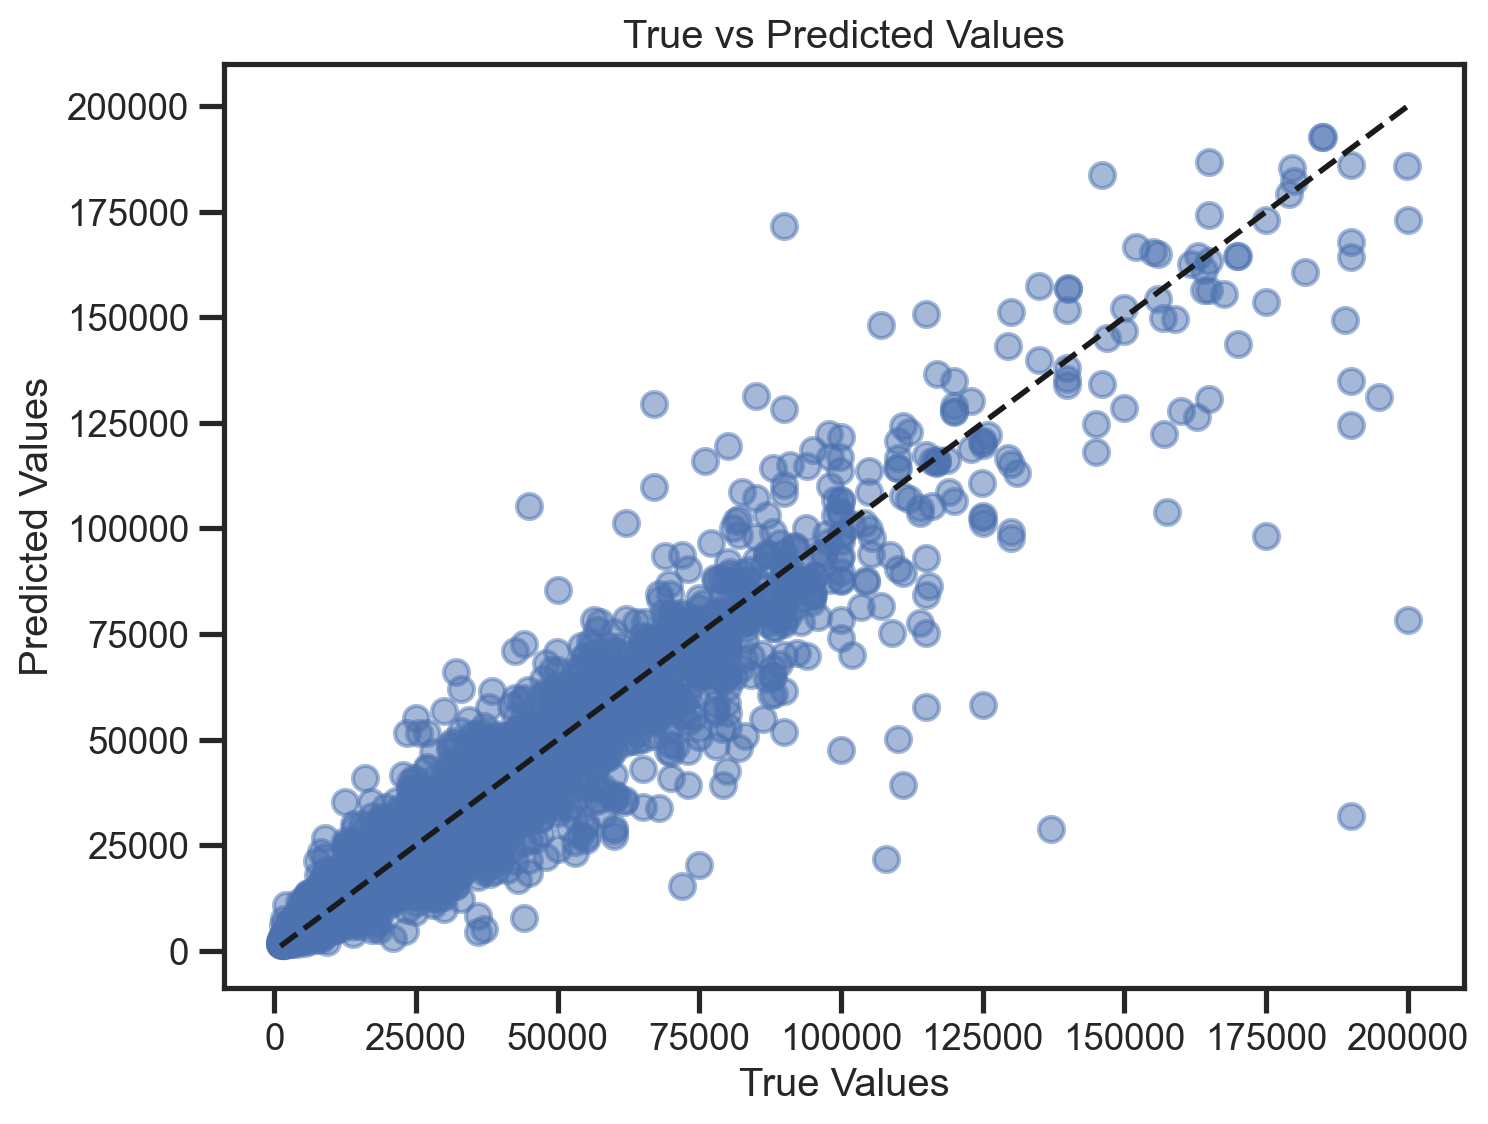

In [577]:
# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

# OverAll Performance Cross Validation

In [671]:
popular_model = HistGradientBoostingRegressor(
    max_depth=20, max_iter=300
)
hgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regr', popular_model)
])

In [672]:
X_train.shape, y_train.shape

((75000, 8), (75000,))

In [673]:
# Perform cross-validation
cv_scores = cross_val_score(hgb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

In [679]:
# Print the RMSE scores for each fold
print("Cross-Validation RMSE scores:", rmse_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Cross-Validation RMSE scores: [5204.58636743 5523.51043807 5364.38174058 5102.8524252  4625.00664289]
Mean RMSE: 5164.067522835511
Standard Deviation of RMSE: 305.05759861746964


In [676]:
# # Lasso is giving a best performance so we Create a new Lasso regression model with the best parameters
# popular_model = Lasso(alpha=0.1)
# poly_features = PolynomialFeatures(degree=2)

# lasso_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('poly', poly_features),
#     ('regr', popular_model)
# ])


In [675]:
# # Perform cross-validation
# cv_scores = cross_val_score(lasso_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-cv_scores)

In [581]:
# Print the RMSE scores for each fold
print("Cross-Validation RMSE scores:", rmse_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)


Cross-Validation RMSE scores: [5805.66174421 6411.51049462 6610.11035956 5276.90743405 5976.83943551]
Mean RMSE: 6016.205893588309
Standard Deviation of RMSE: 469.3461433598533


In [678]:
print(cv_scores.mean(), cv_scores.std())

-26760653.518878747 3084785.794023746


In [674]:
# score = hgb_pipeline.score(X_test, y_test)

In [681]:
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} score: {score}")

Fold 1 score: -27087719.256039932
Fold 2 score: -30509167.55950057
Fold 3 score: -28776591.45863034
Fold 4 score: -26039102.873400547
Fold 5 score: -21390686.446822353


# Actual vs Predicted Plot

In [586]:
# Fit regression model with the best parameters for building plot
# because it is a most popular model
#best_model = Lasso(alpha=0.1)
popular_model = HistGradientBoostingRegressor(
    max_depth=20, max_iter=400
)
#poly_features = PolynomialFeatures(degree=2)

In [587]:
hgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regr', popular_model)
])

In [588]:
hgb_pipeline.fit(X_train, y_train)

# Obtain predicted values
y_train_pred = hgb_pipeline.predict(X_train)
y_pred = hgb_pipeline.predict(X_test)

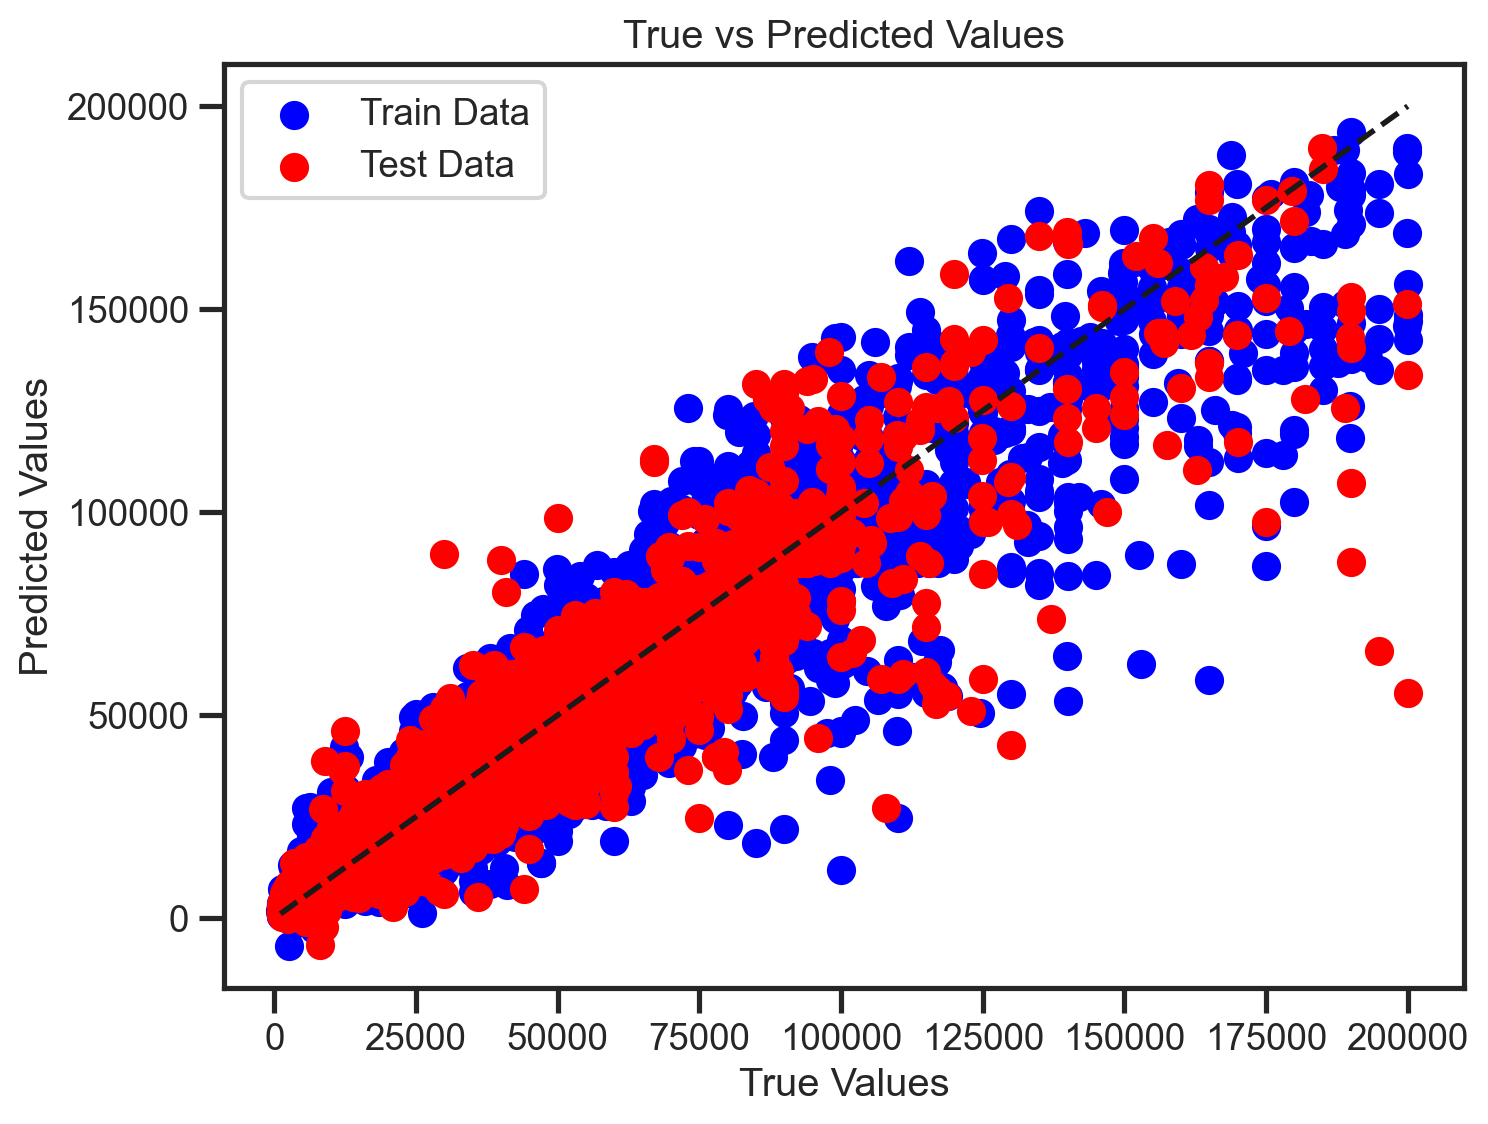

In [589]:
# Plot true vs predicted values
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test, y_pred, color='red', label='Test Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Plot the 45 degree line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Feature Importance 

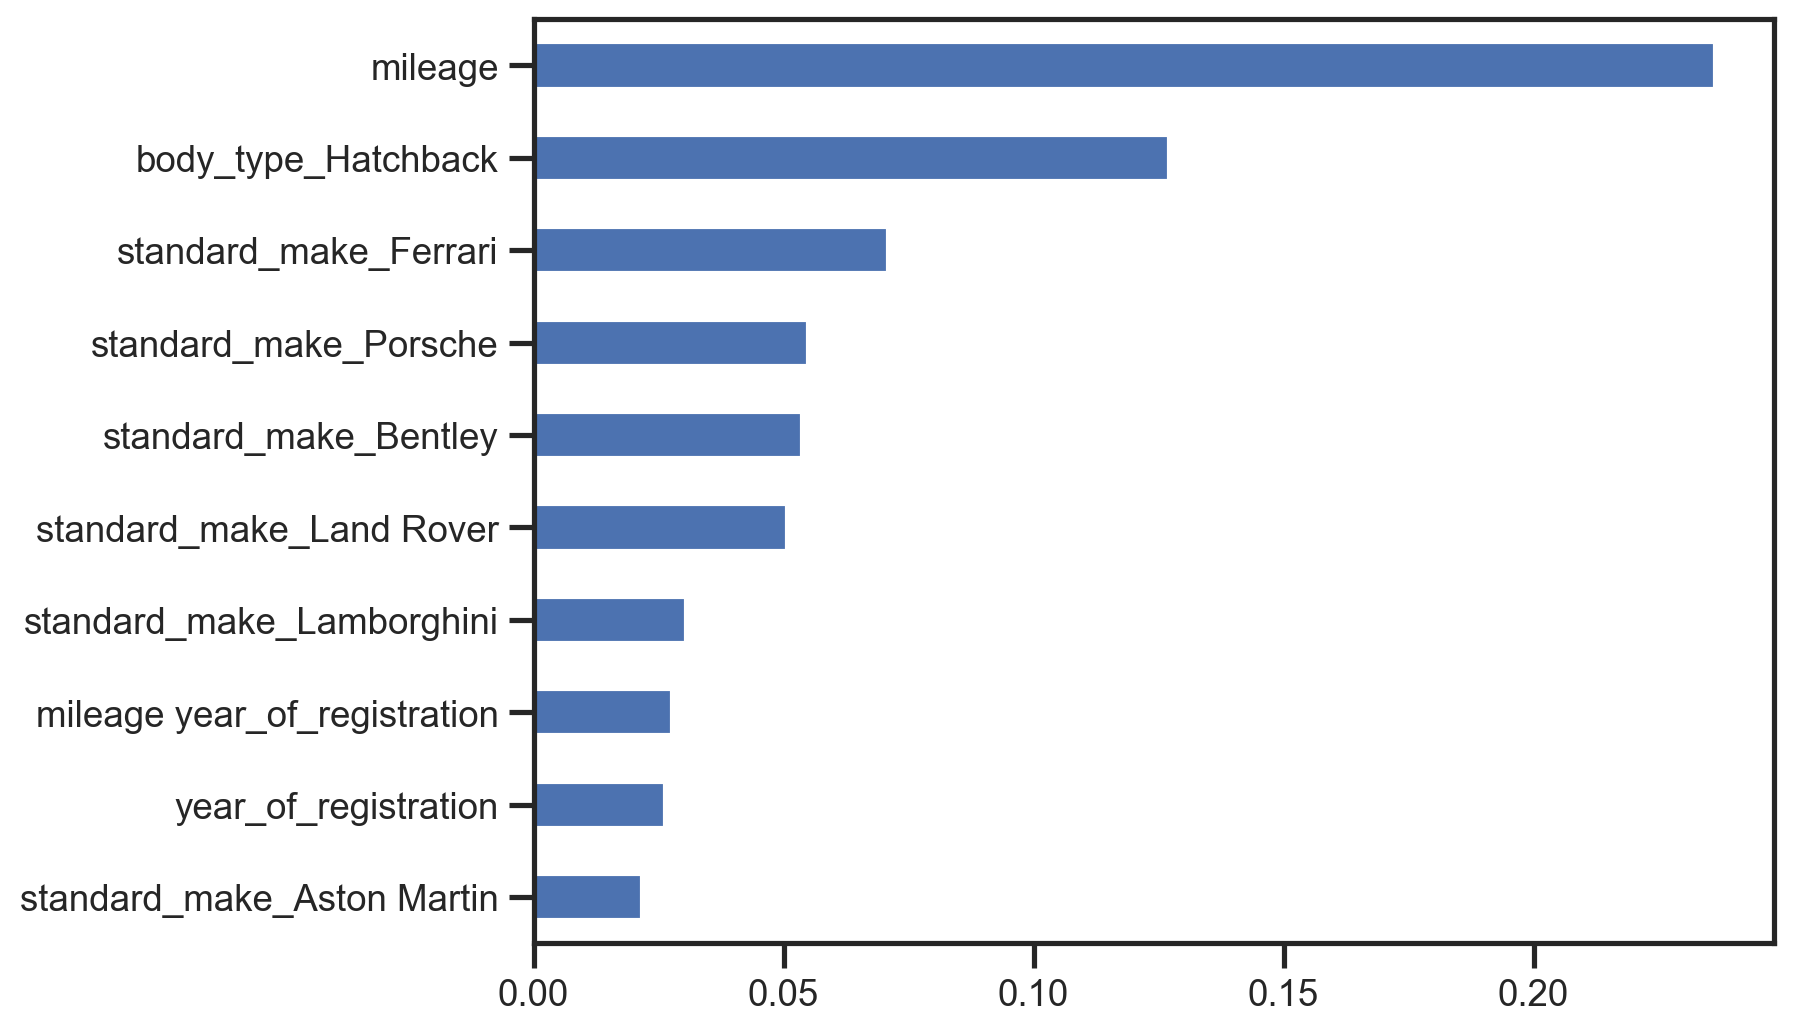

In [590]:
def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

plot_rf_feat_imp_barh(
    clf_pipe['clf'], 
    clf_pipe['preprocessor'].get_feature_names_out()
);

In [ ]:
# import shap

# def plot_shap_feature_importance(hgb_pipeline, X, top_feat_k=10):
#     # Extract the trained HistGradientBoostingRegressor from the pipeline
#     hgb_model = hgb_pipeline['regr']

#     # Extract the preprocessor from the pipeline
#     preprocessor = hgb_pipeline['preprocessor']

#     # Preprocess the data
#     X_preprocessed = preprocessor.transform(X)

#     # Create the SHAP explainer using the trained model and preprocessed data
#     explainer = shap.Explainer(hgb_model, X_preprocessed)

#     # Compute SHAP values for each feature
#     shap_values = explainer(X_preprocessed)

#     # Compute the mean absolute SHAP values for each feature
#     feature_importance = np.mean(np.abs(shap_values.values), axis=0)

#     # Sort the feature importance values
#     sorted_indices = np.argsort(feature_importance)

#     # Select the top k features
#     top_indices = sorted_indices[-top_feat_k:]

#     # Get the corresponding feature names
#     feature_names = X.columns

#     # Plot the feature importance bar plot
#     plt.barh(range(len(top_indices)), feature_importance[top_indices], align='center')
#     plt.yticks(range(len(top_indices)), feature_names[top_indices])
#     plt.xlabel('Mean Absolute SHAP Value')
#     plt.ylabel('Feature')
#     plt.title('Feature Importance (SHAP)')
#     plt.show()

# # Example usage
# plot_shap_feature_importance(hgb_pipeline, X, top_feat_k=10)


# SHAP

In [ ]:
popular_model

In [ ]:
hgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regr', popular_model)
])
hgb_pipeline

In [ ]:
hgb_pipeline.fit(X_train, y_train)

In [ ]:
#!pip install -q shap

In [ ]:
import shap
shap.initjs()

In [ ]:
#pip install numpy==1.21

In [591]:
X_pp = hgb_pipeline['preprocessor'].transform(X_test)
explainer = shap.TreeExplainer(hgb_pipeline['regr'])
shap_values = explainer.shap_values(X_pp)

In [592]:
X_pp.shape

(25000, 797)

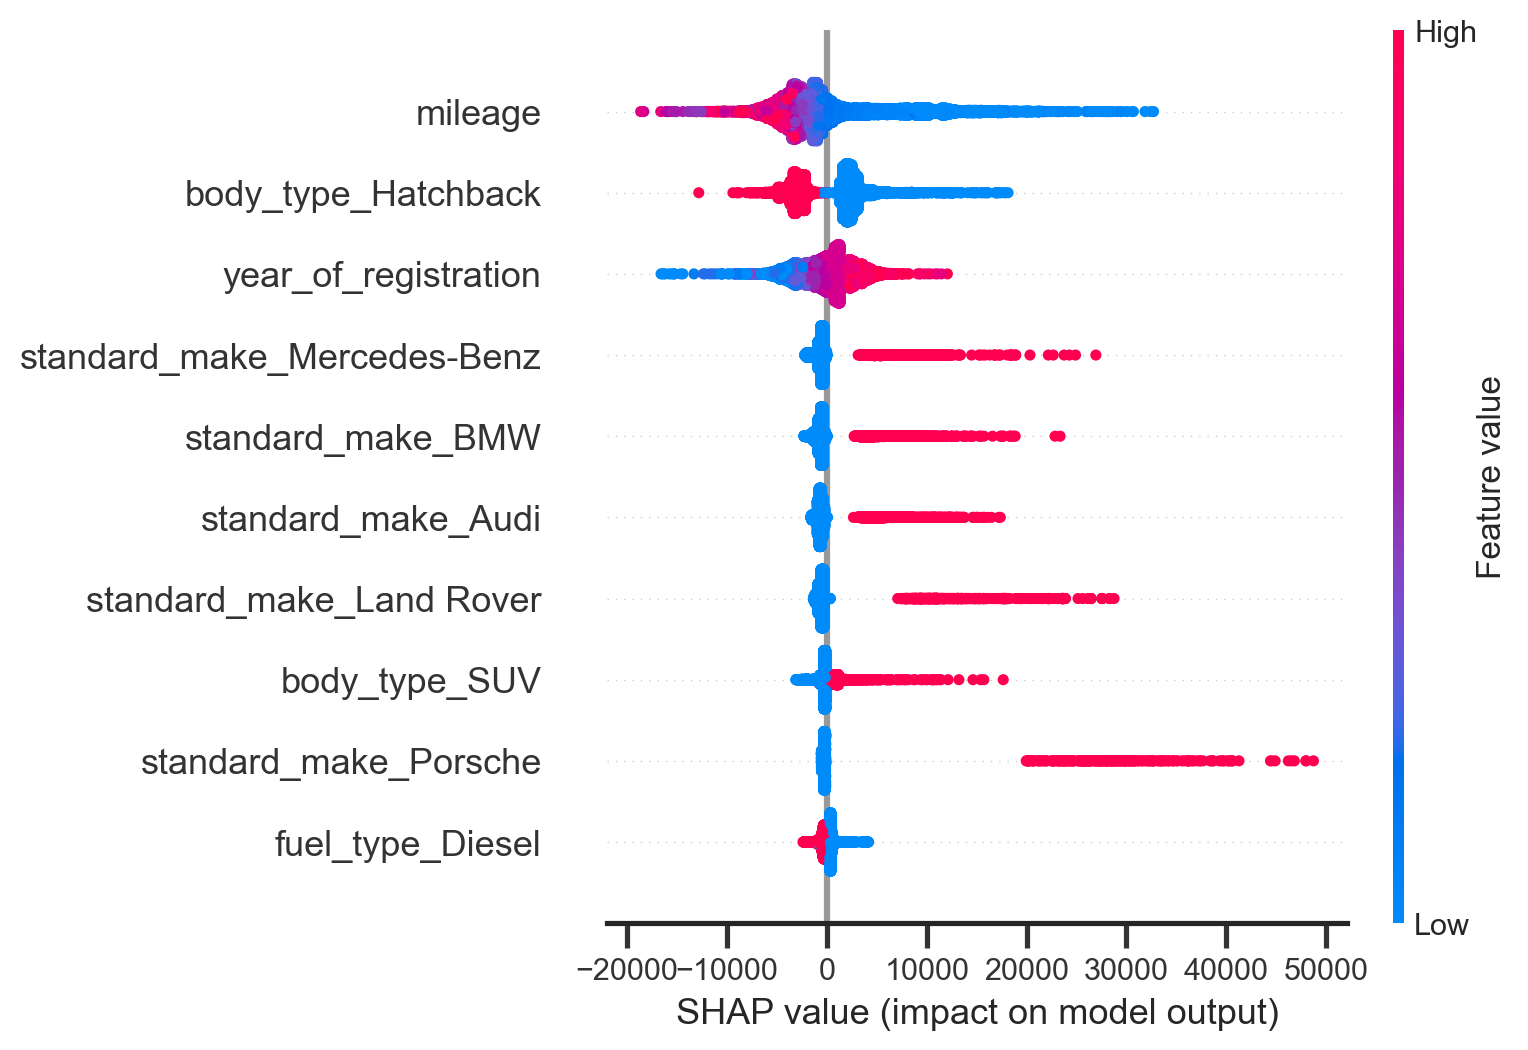

In [593]:
shap.summary_plot(shap_values, X_pp, max_display=10)

In [594]:
instance

mileage standard_colour standard_make standard_model  \
287789  43105.0            Blue      Vauxhall        Mokka X   
33439   12954.0           Black       Peugeot            208   
397865  24354.0            Grey    Volkswagen         Tiguan   
59109   67000.0             Red           Kia           Ceed   
200564  21496.0           Black        Jaguar         F-PACE   

       vehicle_condition  year_of_registration  body_type fuel_type  
287789              USED                2017.0        SUV    Diesel  
33439               USED                2018.0  Hatchback    Diesel  
397865              USED                2016.0        SUV    Petrol  
59109               USED                2010.0  Hatchback    Diesel  
200564              USED                2017.0        SUV    Diesel

In [595]:
X_pp

mileage  year_of_registration  mileage^2  \
380512  0.766948             -0.325641   0.588209   
162544 -1.080819              0.021179   1.168170   
400862 -0.379356              0.714820   0.143911   
62501  -0.734464              1.061640   0.539438   
399720 -0.461750              0.021179   0.213213   
...          ...                   ...        ...   
134774 -1.082025              1.408461   1.170779   
147242  1.125915              0.714820   1.267685   
156385 -0.195548              0.714820   0.038239   
306309 -0.341140             -1.712923   0.116377   
178815  1.320544             -0.672462   1.743837   

        mileage year_of_registration  year_of_registration^2  \
380512                     -0.249750                0.106042   
162544                     -0.022891                0.000449   
400862                     -0.271171                0.510968   
62501                      -0.779737                1.127080   
399720                     -0.009779                0.000449   
...                              ...                     ...   
134774                     -1.523990                1.983762   
147242                      0.804827                0.510968   
156385                     -0.139782                0.510968   
306309                      0.584347                2.934105   
178815                     -0.888015                0.452205   

        standard_colour_Beige  standard_colour_Black  standard_colour_Blue  \
380512                    0.0                    1.0                   0.0   
162544                    0.0                    1.0                   0.0   
400862                    0.0                    0.0                   0.0   
62501                     0.0                    1.0                   0.0   
399720                    0.0                    0.0                   1.0   
...                       ...                    ...                   ...   
134774                    0.0                    0.0                   0.0   
147242                    0.0                    0.0                   1.0   
156385                    0.0                    0.0                   0.0   
306309                    0.0                    1.0                   0.0   
178815                    0.0                    0.0                   0.0   

        standard_colour_Bronze  standard_colour_Brown  ...  body_type_Saloon  \
380512                     0.0                    0.0  ...               0.0   
162544                     0.0                    0.0  ...               0.0   
400862                     0.0                    0.0  ...               0.0   
62501                      0.0                    0.0  ...               0.0   
399720                     0.0                    0.0  ...               0.0   
...                        ...                    ...  ...               ...   
134774                     0.0                    0.0  ...               0.0   
147242                     0.0                    0.0  ...               0.0   
156385                     0.0                    0.0  ...               0.0   
306309                     0.0                    0.0  ...               0.0   
178815                     0.0                    0.0  ...               0.0   

        body_type_Window Van  fuel_type_Bi Fuel  fuel_type_Diesel  \
380512                   0.0                0.0               1.0   
162544                   0.0                0.0               0.0   
400862                   0.0                0.0               0.0   
62501                    0.0                0.0               1.0   
399720                   0.0                0.0               0.0   
...                      ...                ...               ...   
134774                   0.0                0.0               1.0   
147242                   0.0                0.0               0.0   
156385                   0.0                0.0               0.0   
306309         

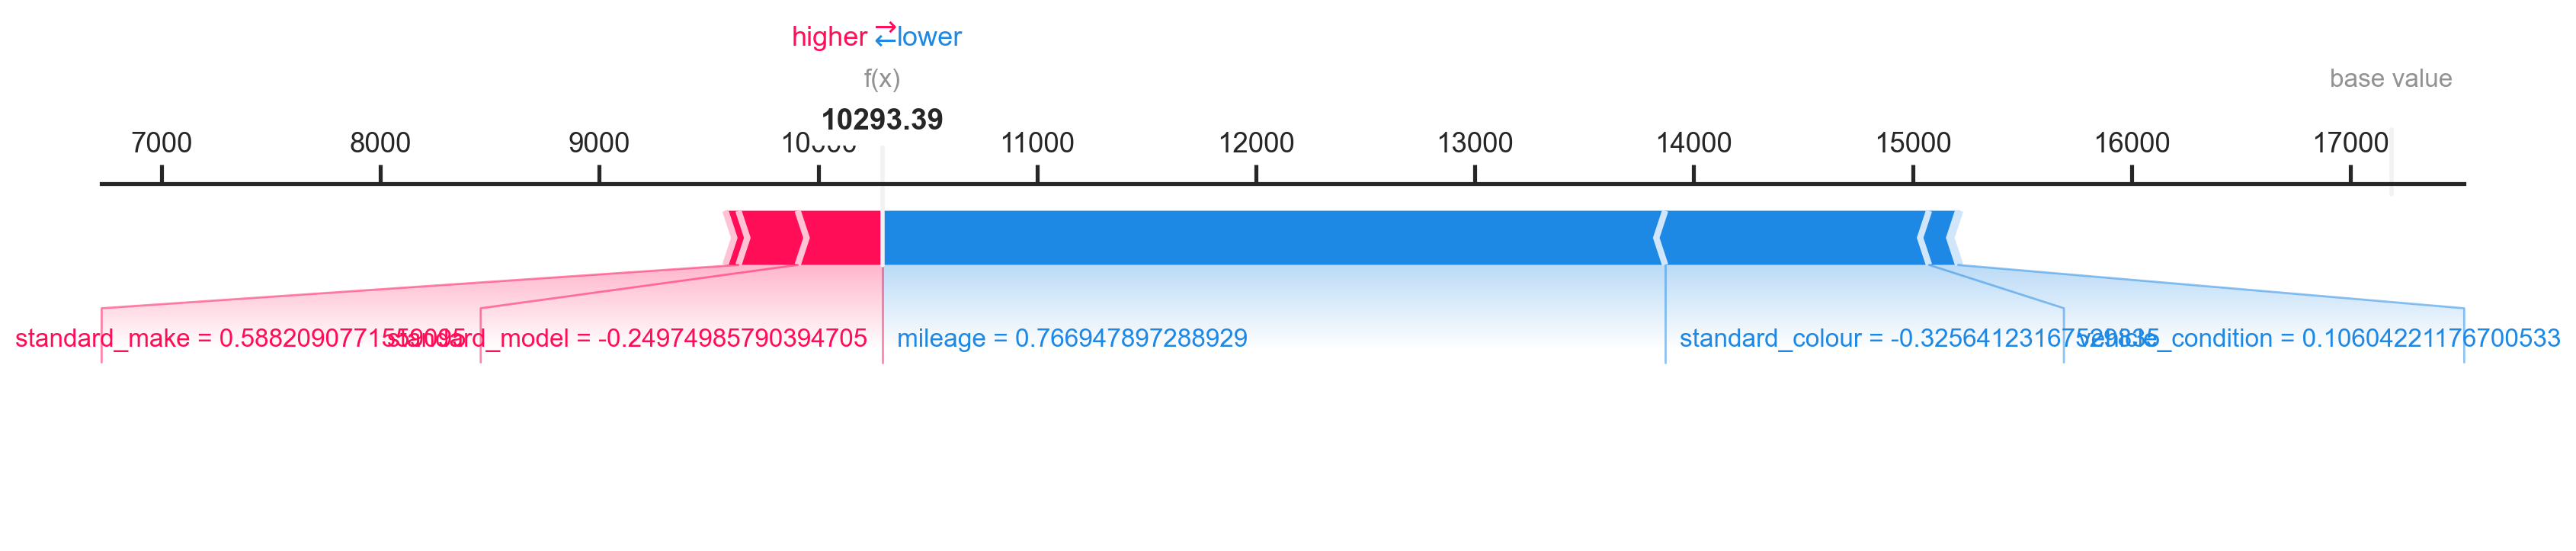

In [596]:
# Select a specific data instance for local explanation
instance_idx = 0
instance = X_test.iloc[[instance_idx]]

# Transform the instance using the preprocessor
X_pp = hgb_pipeline['preprocessor'].transform(instance)

# Create the TreeExplainer
explainer = shap.TreeExplainer(hgb_pipeline['regr'])

# Calculate SHAP values for the transformed instance
shap_values = explainer.shap_values(X_pp)

# Plot local explanation using force plot
shap.force_plot(explainer.expected_value, shap_values, features=X_pp,
                feature_names=X_test.columns, matplotlib=True)

# Display the plot
plt.show()


In [ ]:
# cls_idx = 1
# row_idx = 0
# shap.force_plot(
#     explainer.expected_value[cls_idx], 
#     shap_values[cls_idx][row_idx],
#     features=feature_names
# )

In [597]:
feature_names = X_pp.columns
feature_names

Index(['mileage', 'year_of_registration', 'mileage^2',
       'mileage year_of_registration', 'year_of_registration^2',
       'standard_colour_Beige', 'standard_colour_Black',
       'standard_colour_Blue', 'standard_colour_Bronze',
       'standard_colour_Brown',
       ...
       'body_type_Saloon', 'body_type_Window Van', 'fuel_type_Bi Fuel',
       'fuel_type_Diesel', 'fuel_type_Diesel Hybrid',
       'fuel_type_Diesel Plug-in Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid'],
      dtype='object', length=797)

In [ ]:
# shap.summary_plot(
#     shap_values[1], feature_names, plot_type="bar"
# )

In [ ]:
# Lasso_model = Lasso(alpha=0.1)

# Lasso_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regr', Lasso_model)
# ])
# # Fit the Lasso pipeline on the training data
# Lasso_pipeline.fit(X_train, y_train)


In [ ]:
# X_pp = Lasso_pipeline['preprocessor'].transform(X_test)

In [ ]:
# explainer = shap.Explainer(Lasso_pipeline['regr'])
# shap_values = explainer(X_pp)

# Partial Dependence Plot

In [683]:
hgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr',
                 HistGradientBoostingRegressor(max_depth=20, max_iter=300))])

In [685]:
hgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regr', popular_model)
])
hgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr',
                 HistGradientBoostingRegressor(max_depth=20, max_iter=300))])

In [686]:
hgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr',
                 HistGradientBoostingRegressor(max_depth=20, max_iter=300))])

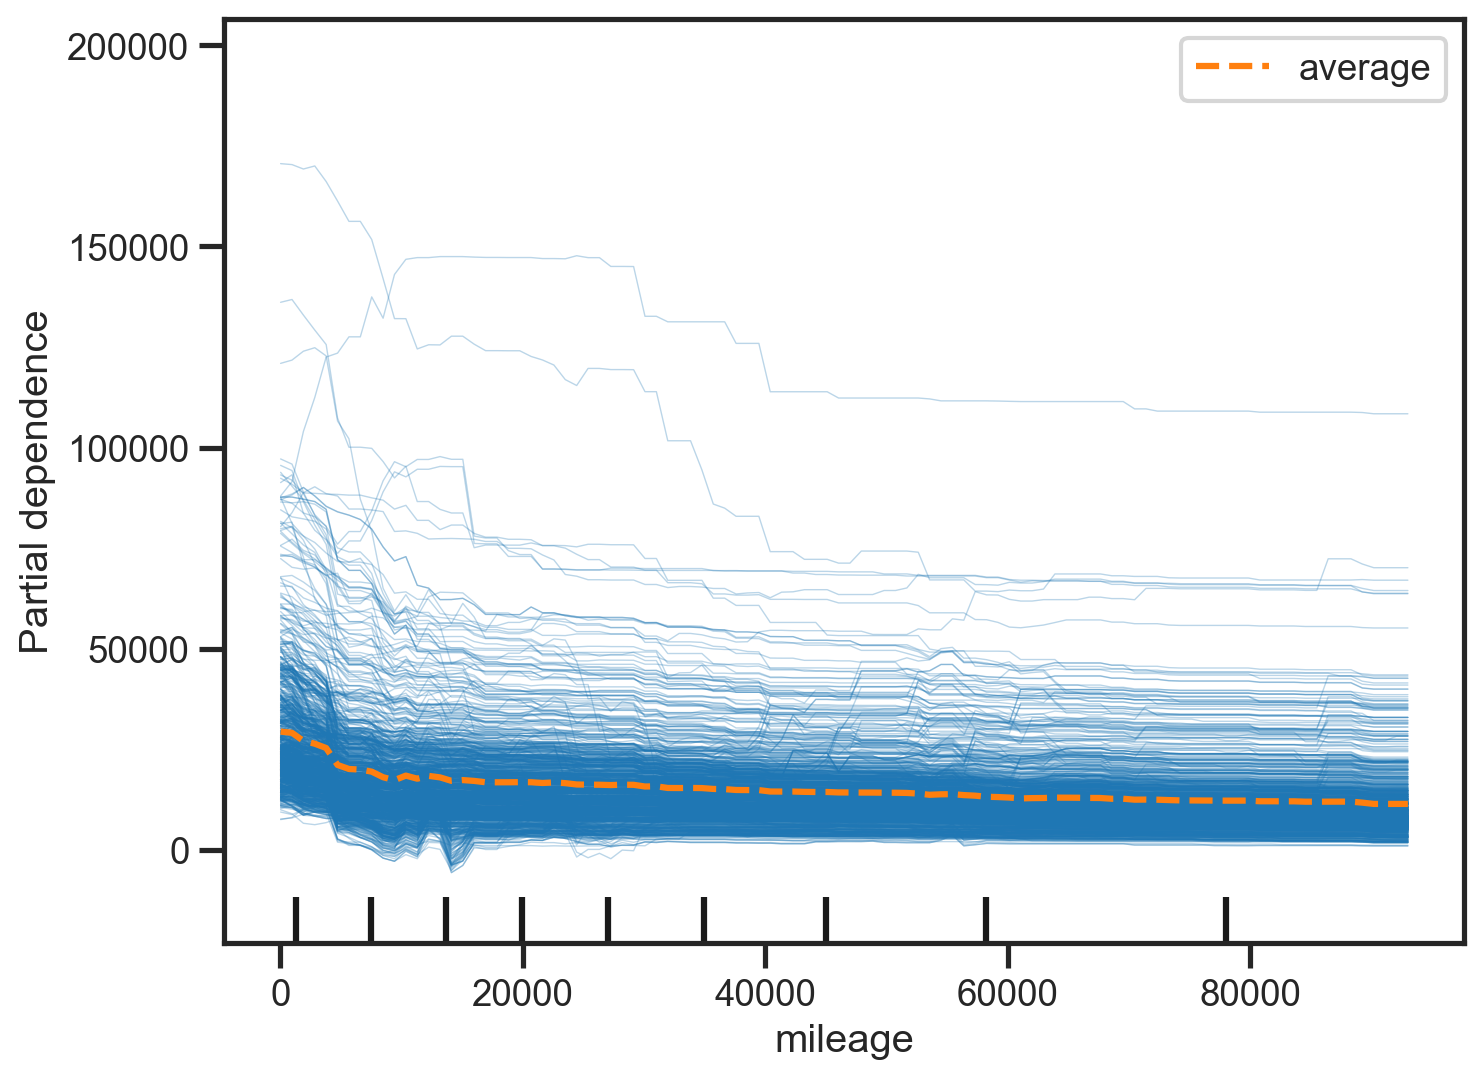

In [688]:
PartialDependenceDisplay.from_estimator(
    hgb_pipeline, X_train, features=['mileage'], kind='both'
);

In [689]:
X_train.head(1)

mileage standard_colour standard_make standard_model  \
387393     50.0            Blue        Jaguar         F-Type   

       vehicle_condition  year_of_registration    body_type fuel_type  
387393              USED                2019.0  Convertible    Petrol

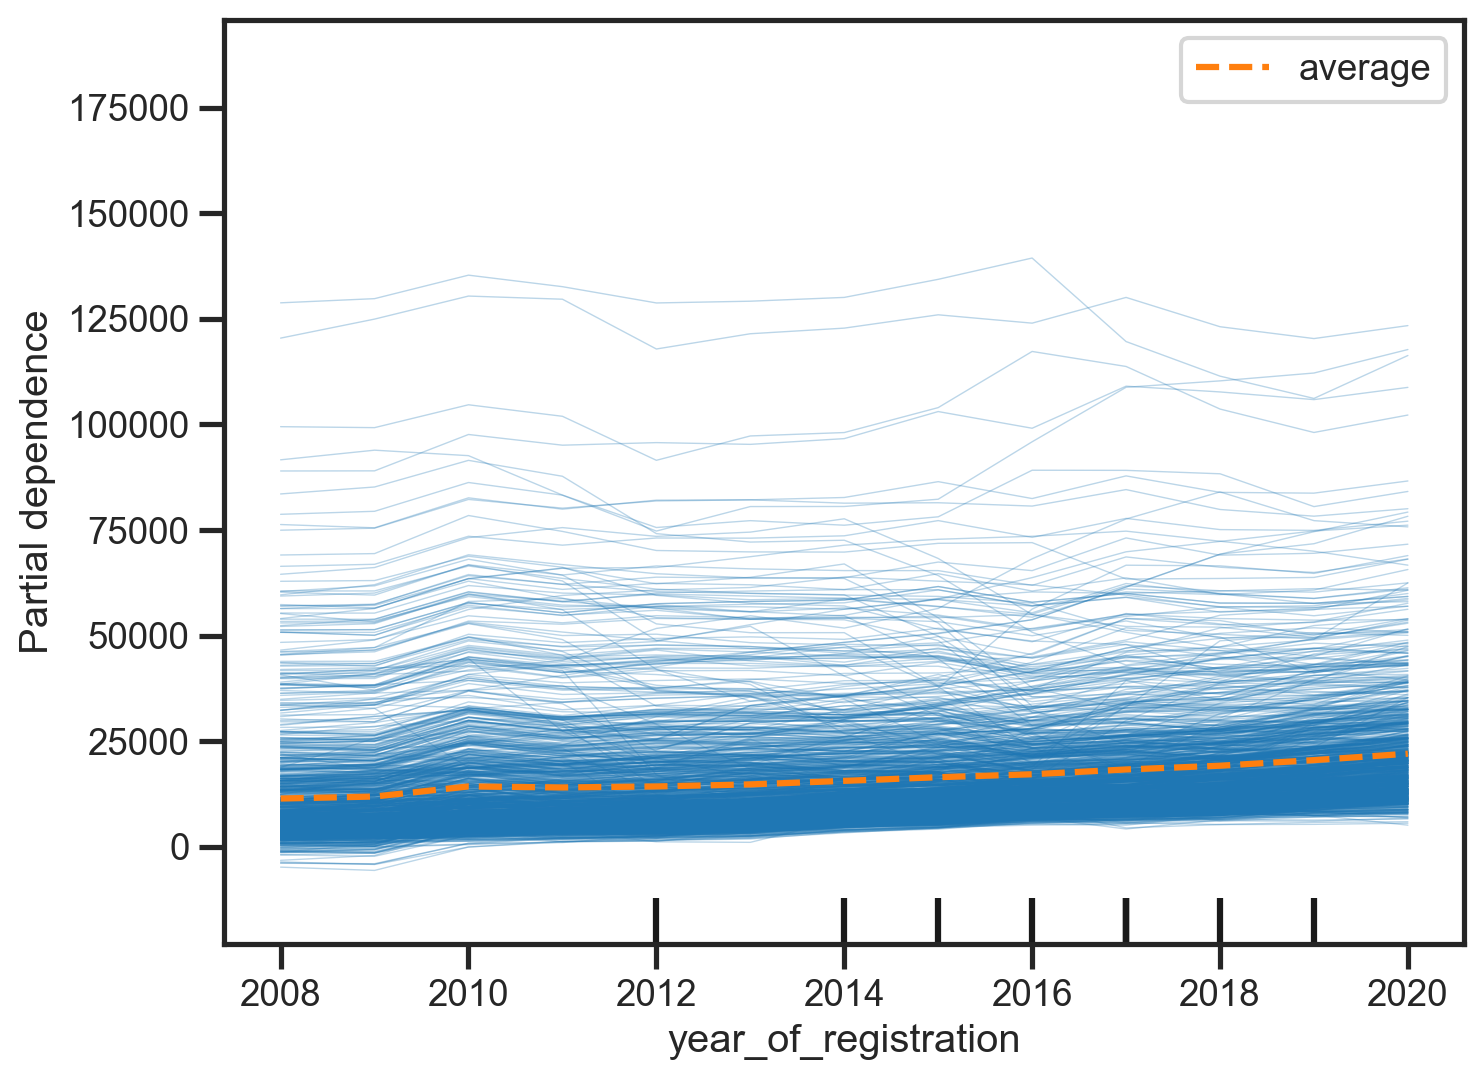

In [691]:
PartialDependenceDisplay.from_estimator(
    hgb_pipeline, X_train, features=['year_of_registration'], kind='both'
);

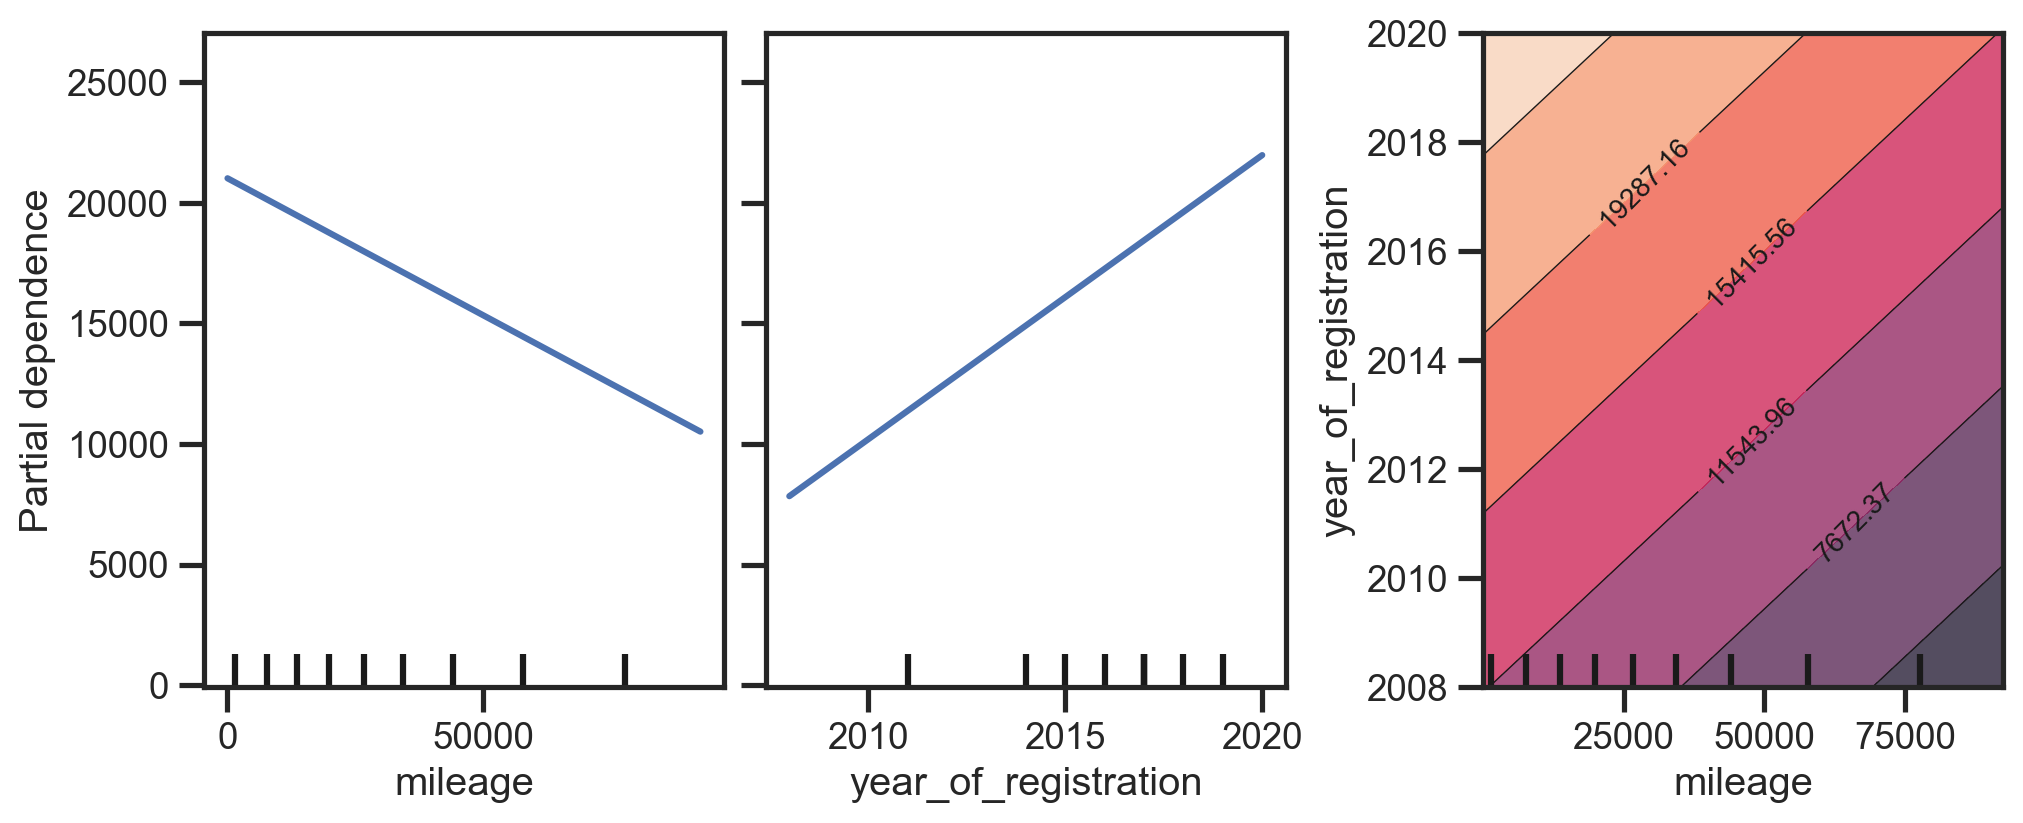

In [692]:
fig, ax = plt.subplots(figsize=(10,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    hgb_pipeline, X_test, 
    features=["mileage", "year_of_registration", ("mileage", "year_of_registration")],
    kind='average', 
    ax=ax, n_cols=3,
    subsample=50, grid_resolution=30, n_jobs=2, random_state=0,
);

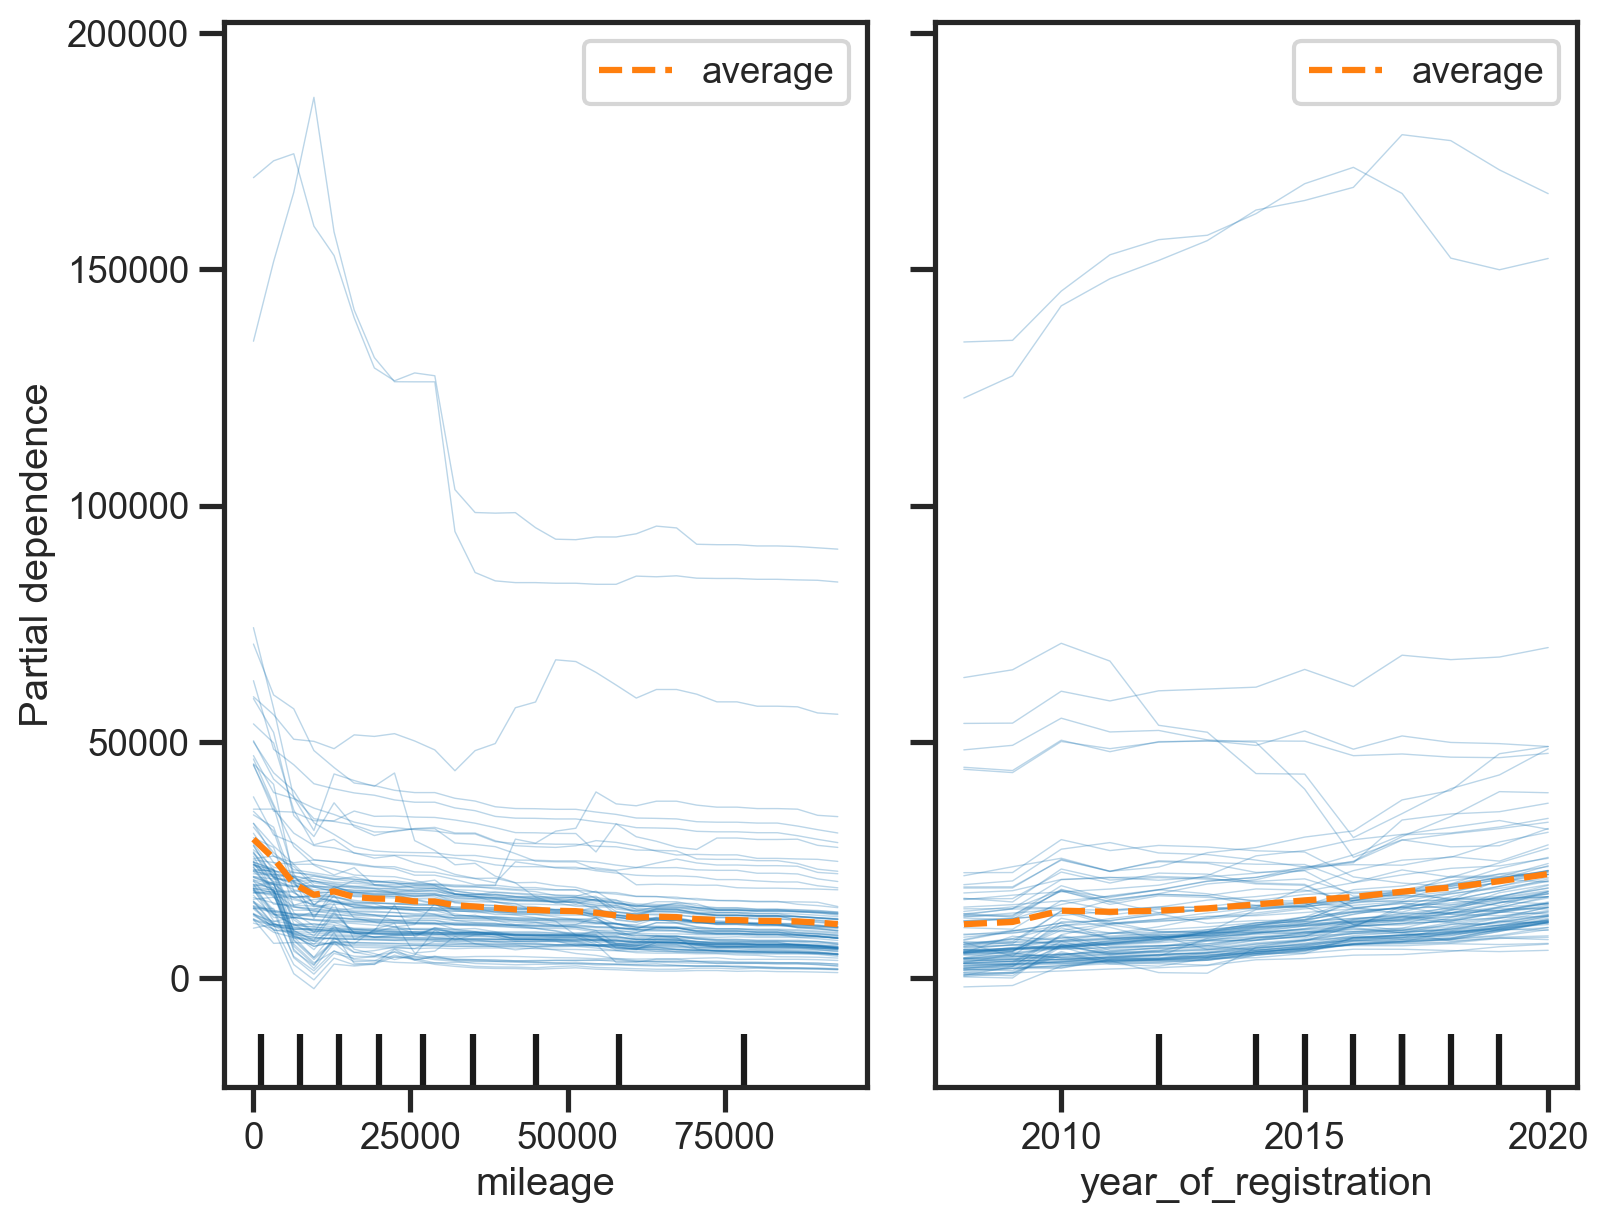

In [694]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    hgb_pipeline, X_train, features=['mileage', 'year_of_registration'],
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

In [ ]:
# fig, ax = plt.subplots(figsize=(10,4), constrained_layout=True)
# PartialDependenceDisplay.from_estimator(
#     hgb_pipeline, X_train, 
#     features=["mileage", "year_of_registration", ("mileage", "year_of_registration")],
#     kind='average', 
#     ax=ax, n_cols=3,
#     subsample=50, grid_resolution=30, n_jobs=2, random_state=0,
# );

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    hgb_pipeline, X_test, features=['mileage', 'year_of_registration'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);